# **Analysis of London Demographics by Ward and Borough and prediction of Crime Rate**




# Introduction

In this project I will analyse data on London demographics collated by the Greater London Authority (GLA) and publicly available here:

https://data.london.gov.uk/dataset/london-borough-profiles

This data includes information such as population age distribution, migration, employment, income, crime, housing and politics.

Below is a quote from the London Data website describing their aims for the data;


> "The London Datastore has been created by the Greater London Authority (GLA) as a first step towards freeing London’s data. We want everyone to be able access the data that the GLA and other public sector organisations hold, and to use that data however they see fit – for free. Raw data often doesn’t tell you anything until it has been presented in a meaningful way and most people don’t have the tools to do this. That’s why we’re keen for you to visualise or build apps from the data available on the site." 

After initial conditioning, analysis and visualisation of the data I will attempt to generate a machine learning model to predict crime rate within London wards and in doing so aim to better understand factors which influence it.

# Project Setup, Data Import, Data Conditioning

In [1]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gdp
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define setup
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.2)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Load Data 
ward_data = pd.read_csv('ward_profiles.csv', encoding= 'unicode_escape')
borough_data = pd.read_csv('borough_profiles.csv', encoding= 'unicode_escape')

I will be using data by borough and ward for visualisation and to get an understanding of London demographics but will then focus on the ward data to develop my machine learning model. Let's begin by looking at what featues are available in each dataset...

In [3]:
for col in borough_data.columns:
  print(col)

Code
Area_name
Inner/_Outer_London
GLA_Population_Estimate_2017
GLA_Household_Estimate_2017
Inland_Area_(Hectares)
Population_density_(per_hectare)_2017
Average_Age,_2017
Proportion_of_population_aged_0-15,_2015
Proportion_of_population_of_working-age,_2015
Proportion_of_population_aged_65_and_over,_2015
Net_internal_migration_(2015)
Net_international_migration_(2015)
Net_natural_change_(2015)
%_of_resident_population_born_abroad_(2015)
Largest_migrant_population_by_country_of_birth_(2011)
%_of_largest_migrant_population_(2011)
Second_largest_migrant_population_by_country_of_birth_(2011)
%_of_second_largest_migrant_population_(2011)
Third_largest_migrant_population_by_country_of_birth_(2011)
%_of_third_largest_migrant_population_(2011)
%_of_population_from_BAME_groups_(2016)
%_people_aged_3+_whose_main_language_is_not_English_(2011_Census)
Overseas_nationals_entering_the_UK_(NINo),_(2015/16)
New_migrant_(NINo)_rates,_(2015/16)
Largest_migrant_population_arrived_during_2015/16
Second_la

In [4]:
for col in ward_data.columns:
  print(col)


Ward name
Old code
New code
Population - 2015
Children aged 0-15 - 2015
Working-age (16-64) - 2015
Older people aged 65+ - 2015
% All Children aged 0-15 - 2015
% All Working-age (16-64) - 2015
% All Older people aged 65+ - 2015
Mean Age - 2013
Median Age - 2013
Area - Square Kilometres
Population density (persons per sq km) - 2013
% BAME - 2011
% Not Born in UK - 2011
% English is First Language of no one in household - 2011
General Fertility Rate - 2013
Male life expectancy -2009-13
Female life expectancy -2009-13 
% children in reception year who are obese - 2011/12 to 2013/14
% children in year 6 who are obese- 2011/12 to 2013/14
Rate of All Ambulance Incidents per 1,000 population - 2014
Rates of ambulance call outs for alcohol related illness - 2014
Number Killed or Seriously Injured on the roads - 2014
In employment (16-64) - 2011
Employment rate (16-64) - 2011
Number of jobs in area - 2013
Employment per head of resident WA population - 2013
Rate of new registrations of migrant 

In [5]:
borough_data.head(2)

Code             Area_name Inner/_Outer_London  \
0  E09000001        City of London        Inner London   
1  E09000002  Barking and Dagenham        Outer London   

   GLA_Population_Estimate_2017  GLA_Household_Estimate_2017  \
0                          8800                         5326   
1                        209000                        78188   

   Inland_Area_(Hectares)  Population_density_(per_hectare)_2017  \
0                     290                                   30.3   
1                    3611                                   57.9   

   Average_Age,_2017  Proportion_of_population_aged_0-15,_2015  \
0               43.2                                      11.4   
1               32.9                                      27.2   

   Proportion_of_population_of_working-age,_2015  ...  \
0                                           73.1  ...   
1                                           63.1  ...   

   Happiness_score_2011-14_(out_of_10)  Anxiety_score_2011-14_(out_of_10)  \
0                                  6.0                                5.6   
1                                  7.1                                3.1   

   Childhood_Obesity_Prevalance_(%)_2015/16  \
0                                       NaN   
1                                      28.5   

   People_aged_17+_with_diabetes_(%)  \
0                                2.6   
1                                7.3   

   Mortality_rate_from_causes_considered_preventable_2012/14  \
0                                                129           
1                                                228           

  Political_control_in_council  \
0                          NaN   
1                          Lab   

   Proportion_of_seats_won_by_Conservatives_in_2014_election  \
0                                                NaN           
1                                                0.0           

  Proportion_of_seats_won_by_Labour_in_2014_election  \
0                                                NaN   
1                                              100.0   

   Proportion_of_seats_won_by_Lib_Dems_in_2014_election  \
0                                                NaN      
1                                                0.0      

  Turnout_at_2014_local_elections  
0                             NaN  
1                            36.5  

[2 rows x 84 columns]

In [6]:
ward_data.describe().transpose()

count           mean  \
Population - 2015                                   660.0  121988.863636   
Children aged 0-15 - 2015                           660.0   23510.227273   
Working-age (16-64) - 2015                          660.0   79260.075758   
Older people aged 65+ - 2015                        660.0   19219.090909   
% All Children aged 0-15 - 2015                     660.0      19.788182   
...                                                   ...            ...   
% area that is open space - 2014                    659.0      27.467527   
Cars per household - 2011                           660.0       0.841061   
Average Public Transport Accessibility score - ...  659.0       3.778604   
% travel by bicycle to work - 2011                  660.0       3.918788   
Turnout at Mayoral election - 2012                  659.0      34.391351   

                                                             std     min  \
Population - 2015                                   2.151292e+06  5300.0   
Children aged 0-15 - 2015                           4.077106e+05   650.0   
Working-age (16-64) - 2015                          1.363510e+06  3050.0   
Older people aged 65+ - 2015                        3.808352e+05   600.0   
% All Children aged 0-15 - 2015                     3.730876e+00     6.5   
...                                                          ...     ...   
% area that is open space - 2014                    1.740131e+01     0.0   
Cars per household - 2011                           3.244167e-01     0.2   
Average Public Transport Accessibility score - ...  1.393858e+00     1.3   
% travel by bicycle to work - 2011                  3.357981e+00     0.2   
Turnout at Mayoral election - 2012                  5.390451e+00    19.3   

                                                         25%      50%  \
Population - 2015                                   11700.00  13800.0   
Children aged 0-15 - 2015                            2150.00   2700.0   
Working-age (16-64) - 2015                           7787.50   9600.0   
Older people aged 65+ - 2015                         1200.00   1500.0   
% All Children aged 0-15 - 2015                        17.70     19.8   
...                                                      ...      ...   
% area that is open space - 2014                       14.15     24.2   
Cars per household - 2011                               0.60      0.8   
Average Public Transport Accessibility score - ...      2.70      3.4   
% travel by bicycle to work - 2011                      1.30      2.8   
Turnout at Mayoral election - 2012                     31.10     34.4   

                                                          75%         max  
Population - 2015                                   16062.500  54613400.0  
Children aged 0-15 - 2015                            3400.000  10335450.0  
Working-age (16-64) - 2015                          11200.000  34540350.0  
Older people aged 65+ - 2015                         1900.000   9737650.0  
% All Children aged 0-15 - 2015                        22.025        32.7  
...                                                       ...         ...  
% area that is open space - 2014                       37.700        88.5  
Cars per household - 2011                               1.100         1.7  
Average Public Transport Accessibility score - ...      4.650         8.0  
% travel by bicycle to work - 2011                      5.800        19.1  
Turnout at Mayoral election - 2012                     37.800        51.7  

[64 rows x 8 columns]

### Missing Data Imputation

Borough data will primarily be used for data analysis and visualisation rather than prediction so I will not worry about missing data in this dataset for now (there is little missing data except from the City of London borough wich has 33% of the features missing).

Instead I will focus on dealing with the missing data in the ward dataset...

In [7]:
ward_data['Ward name']

0                             City of London
1               Barking and Dagenham - Abbey
2              Barking and Dagenham - Alibon
3           Barking and Dagenham - Becontree
4      Barking and Dagenham - Chadwell Heath
                       ...                  
655                           Waltham Forest
656                               Wandsworth
657                              Westminster
658                                   London
659                                  England
Name: Ward name, Length: 660, dtype: object

In [8]:
# The last few rows in the dataframe are averages for the boroughs, London and England rather than wards and so I will drop these
ward_data.drop(ward_data.index[625:660], inplace=True)

In [9]:
#Function to identiy missing data in the dataframe

def compute_missing_values(df):
    #total number of missing values
    total_missing = df.isnull().sum().sort_values(ascending=False)
    
    #calculating the percentage of missing values
    percentage_missing = (100 * df.isnull().sum() / len(df))
    
    #Missing values table - total, percentage
    table_missing = pd.concat([total_missing, percentage_missing], axis = 1, 
                              keys = ['Missing values', 'Percentage of Missing Values'])
    
    #Filtering the columns with missing values
    table_missing = table_missing[table_missing.iloc[:, 0] != 0]
    
    #Summary 
    print("Total number of columns:" + str(df.shape[1]) + "\nColumns with missing values:" +str(table_missing.shape[0]))
    
    return table_missing

missing_values_ward = compute_missing_values(ward_data)
missing_values_ward

Total number of columns:67
Columns with missing values:5


Missing values  \
% children in reception year who are obese - 20...              17   
% children in year 6 who are obese- 2011/12 to ...              12   
Deliberate Fires per 1,000 population - 2014                    11   
Employment per head of resident WA population -...               2   
Number of jobs in area - 2013                                    2   

                                                    Percentage of Missing Values  
% children in reception year who are obese - 20...                          2.72  
% children in year 6 who are obese- 2011/12 to ...                          1.92  
Deliberate Fires per 1,000 population - 2014                                1.76  
Employment per head of resident WA population -...                          0.32  
Number of jobs in area - 2013                                               0.32

There is a small amount of data missing. These could be dealt with through further research, deletion of rows or columns or imputation using machine learning. However since the percentages of missing values is very small I will simply subsittue the feature mean values for each missing value for now.

In [10]:
ward_data['% children in reception year who are obese - 2011/12 to 2013/14'].fillna((ward_data['% children in reception year who are obese - 2011/12 to 2013/14'].mean()), inplace=True)
ward_data['% children in year 6 who are obese- 2011/12 to 2013/14'].fillna((ward_data['% children in year 6 who are obese- 2011/12 to 2013/14'].mean()), inplace=True)
ward_data['Deliberate Fires per 1,000 population - 2014'].fillna((ward_data['Deliberate Fires per 1,000 population - 2014'].mean()), inplace=True)
ward_data['Employment per head of resident WA population - 2013'].fillna((ward_data['Employment per head of resident WA population - 2013'].mean()), inplace=True)
ward_data['Number of jobs in area - 2013'].fillna((ward_data['Number of jobs in area - 2013'].mean()), inplace=True)

# Univariant Analysis

In [11]:
# Population size and age distribution

In [12]:
population_data = borough_data[['Area_name','GLA_Population_Estimate_2017']]
population_data['Proportion children (Age 0-15)']=(borough_data['Proportion_of_population_aged_0-15,_2015']/100)*borough_data['GLA_Population_Estimate_2017']
population_data['Proportion Working Age']=(borough_data['Proportion_of_population_of_working-age,_2015']/100)*borough_data['GLA_Population_Estimate_2017']
population_data['Proportion aged over 65']=(borough_data['Proportion_of_population_aged_65_and_over,_2015']/100)*borough_data['GLA_Population_Estimate_2017']
population_data.sort_values('GLA_Population_Estimate_2017', ascending=False, inplace=True)
population_data.head()

Area_name  GLA_Population_Estimate_2017  Proportion children (Age 0-15)  \
2     Barnet                        389600                         82205.6   
7    Croydon                        386500                         85030.0   
8     Ealing                        351600                         75242.4   
24    Newham                        342900                         77838.3   
9    Enfield                        333000                         75924.0   

    Proportion Working Age  Proportion aged over 65  
2                 252850.4                  54544.0  
7                 250838.5                  50245.0  
8                 234868.8                  41488.8  
24                240715.8                  24003.0  
9                 214452.0                  42624.0

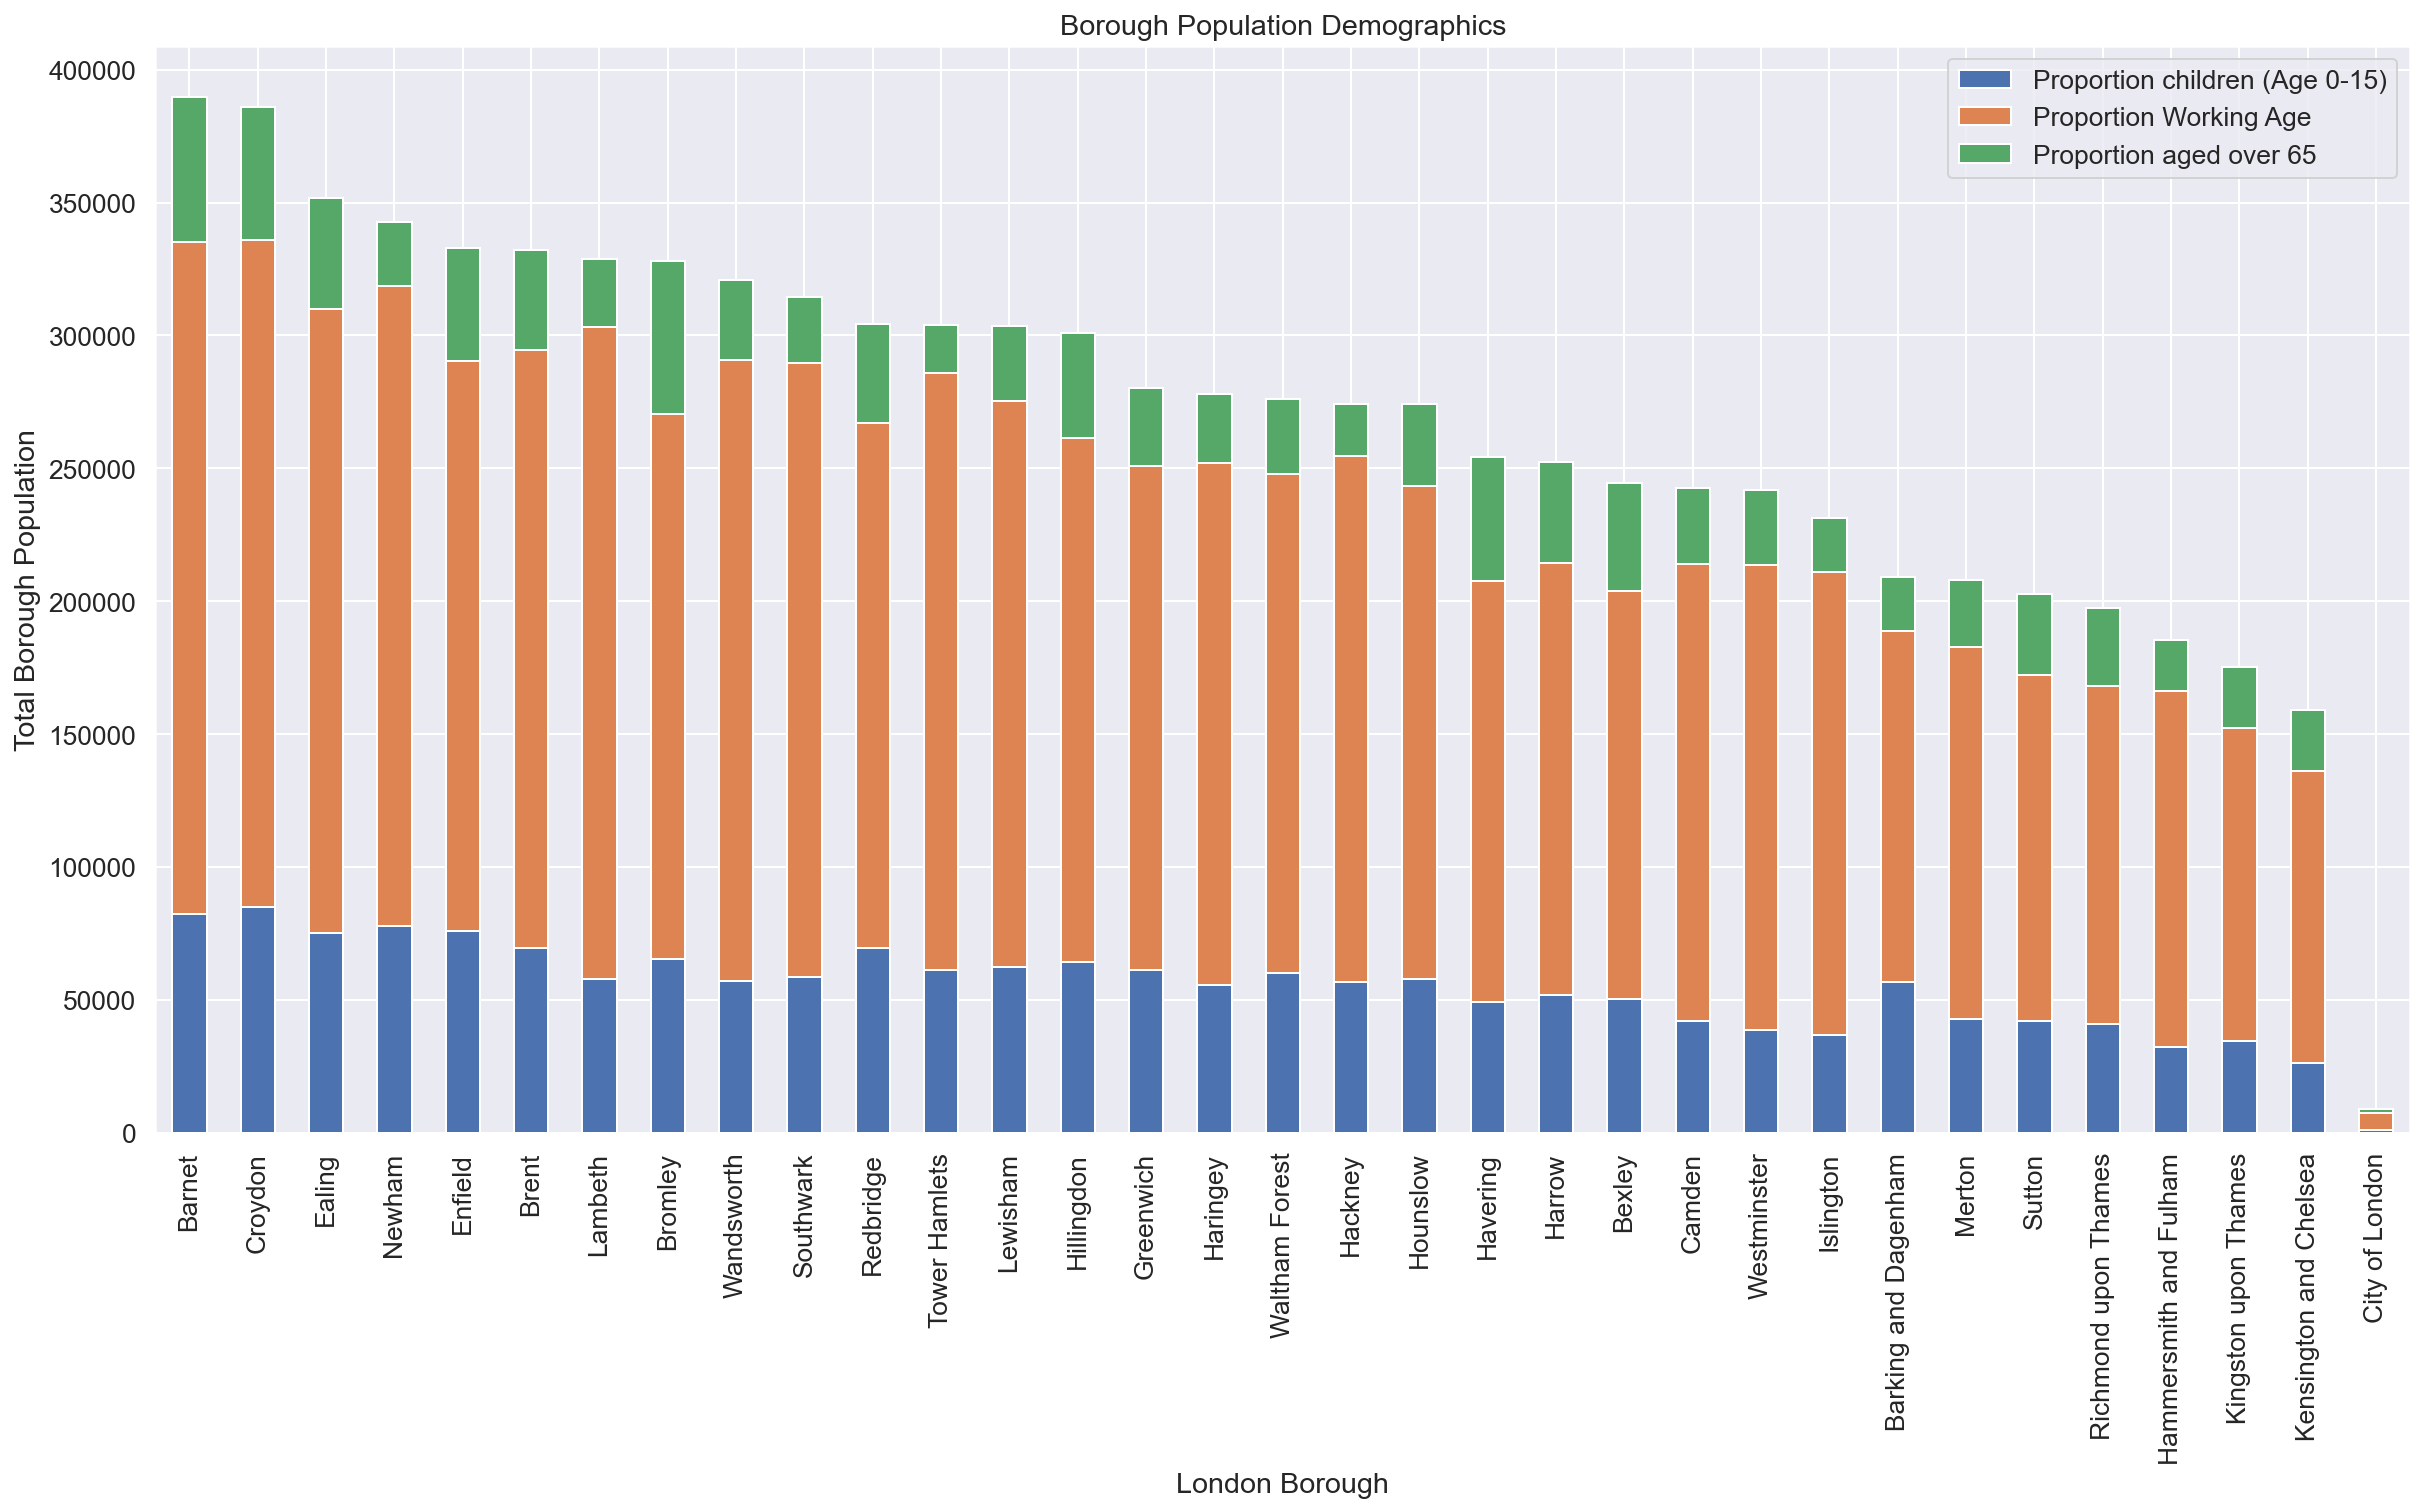

In [13]:
population_data.reset_index().plot(x="Area_name", y=["Proportion children (Age 0-15)", "Proportion Working Age","Proportion aged over 65"], kind="bar",stacked=True)
plt.title("Borough Population Demographics")
plt.xlabel("London Borough")
plt.ylabel("Total Borough Population")
plt.gcf().set_size_inches(18, 10)

As shown above City of London borough clearly has an anomalously small population size which may contribute significantly to its anomalous crime rates. 

Elderly popualtion in London as a whole is quite a small percentage. 

Proportion of children, working age adults and elderly is quite even across the boroughs.

In [14]:
# Migration plots

In [15]:
all_nodes = borough_data.Area_name.values.tolist() + borough_data["Largest_migrant_population_by_country_of_birth_(2011)"].values.tolist()
source_indices = [all_nodes.index(measure) for measure in borough_data["Largest_migrant_population_by_country_of_birth_(2011)"]]
target_indices = [all_nodes.index(country) for country in borough_data.Area_name]

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 20,
      thickness = 20,
      line = dict(color = "black", width = 1.0),
      label =  all_nodes,
    ),

    link = dict(
      source =  source_indices,
      target =  target_indices,
      value =  borough_data["%_of_largest_migrant_population_(2011)"],
))])

fig.update_layout(title_text="Migration into boroughs- Largest migrant population",font_size=10)
fig.update_layout(autosize=False, width=800, height=800,)
fig.show()

In [16]:
# Employment

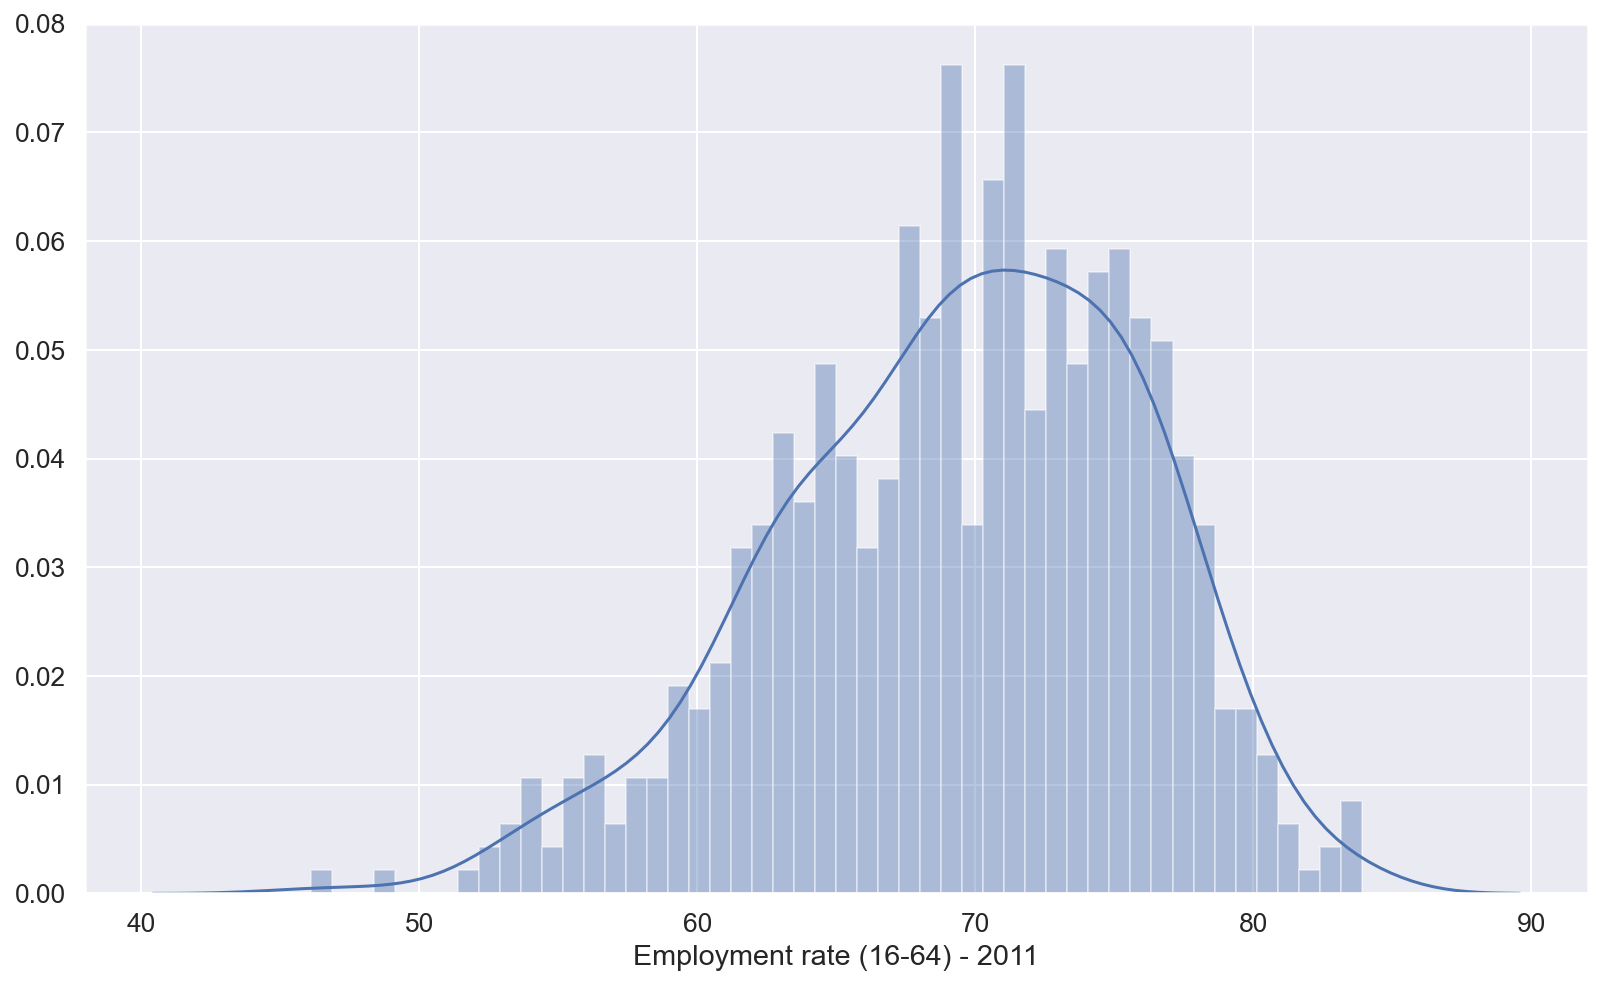

In [17]:
sns.set(font_scale=1.2)
sns.distplot(ward_data["Employment rate (16-64) - 2011"],bins=50)
plt.gcf().set_size_inches(12,8)

In [18]:
# Income

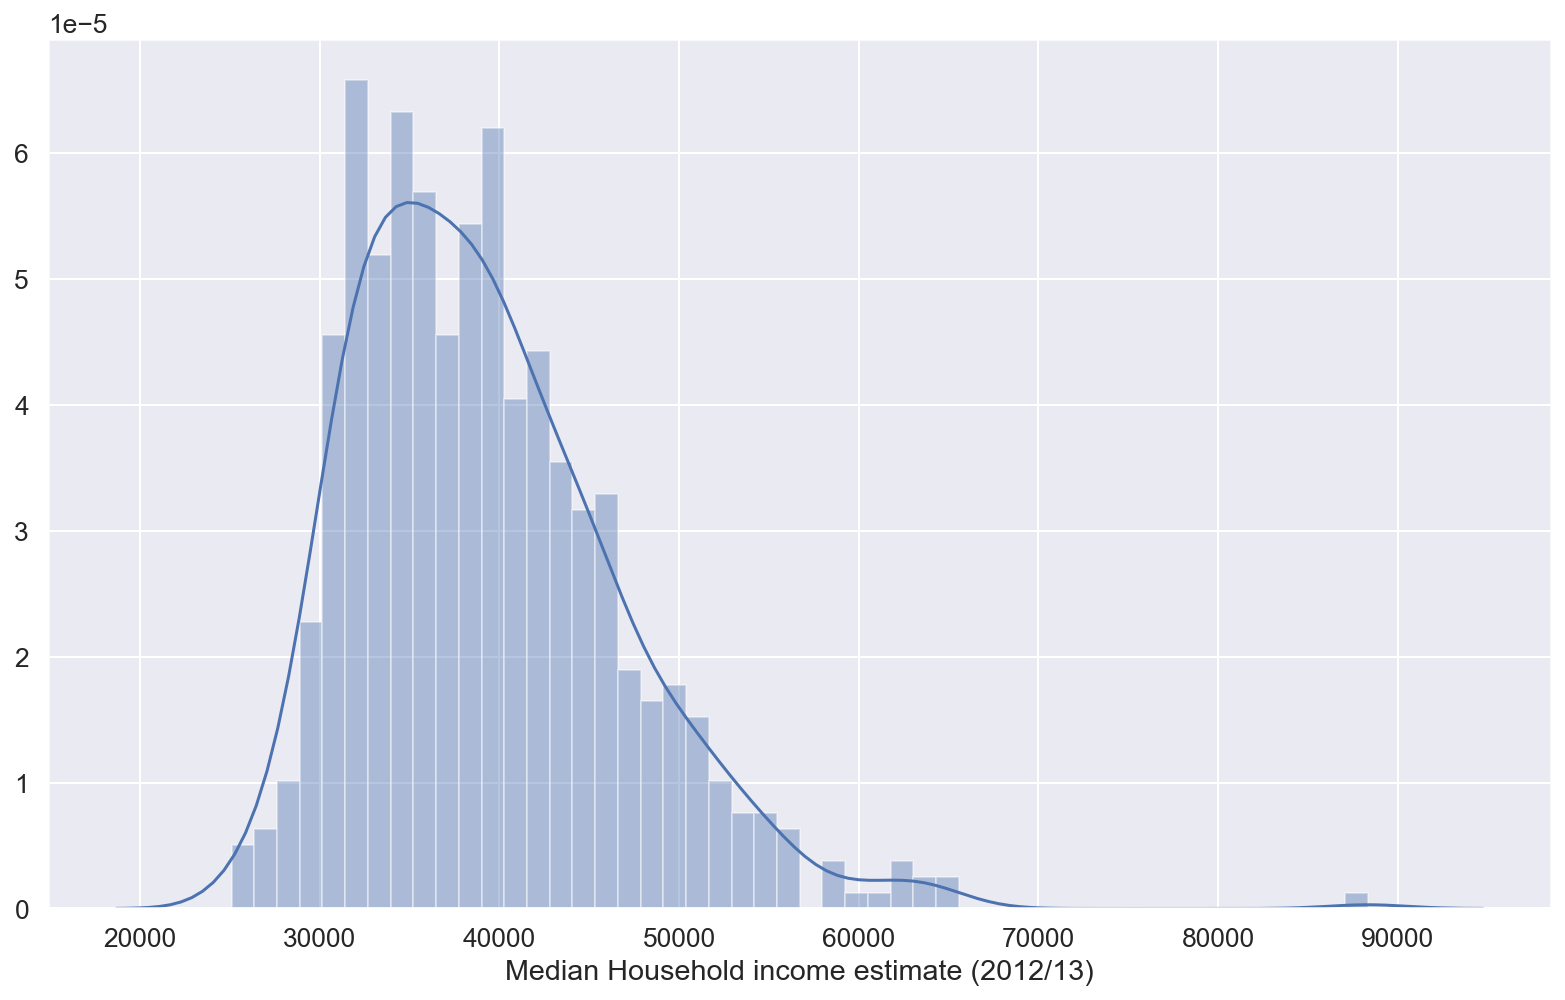

In [19]:
sns.set(font_scale=1.2)
sns.distplot(ward_data["Median Household income estimate (2012/13)"],bins=50)
plt.gcf().set_size_inches(12,8)

In [20]:
#Crime

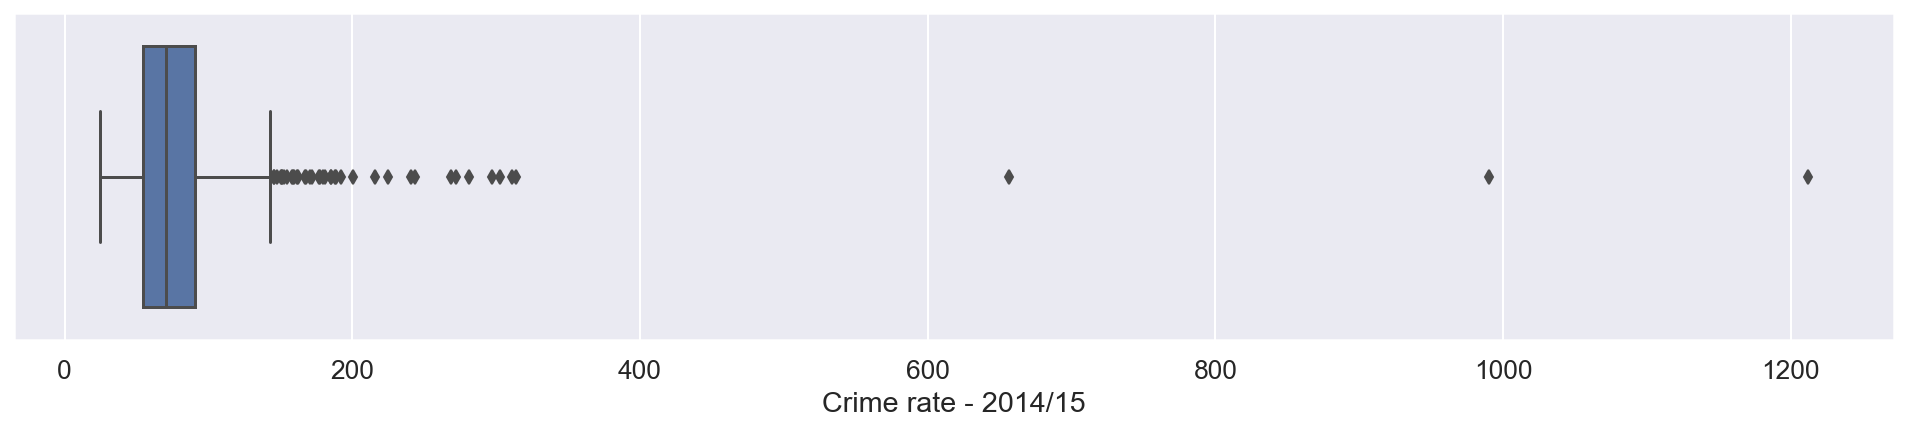

In [21]:
sns.set(font_scale=1.2)
sns.boxplot(x='Crime rate - 2014/15', data = ward_data)
plt.gcf().set_size_inches(15, 3)

In [22]:
ward_data.sort_values(by=['Crime rate - 2014/15'], ascending= False).head(4)

Ward name Old code   New code  Population - 2015  \
624     Westminster - West End   00BKGW  E05000649            11250.0   
619  Westminster - St. James's   00BKGQ  E05000644            12050.0   
0               City of London     00AA  E09000001             8100.0   
104        Camden - Bloomsbury   00AGGE  E05000129            11700.0   

     Children aged 0-15 - 2015  Working-age (16-64) - 2015  \
624                      950.0                      8950.0   
619                     1100.0                      9650.0   
0                        650.0                      6250.0   
104                      750.0                      9800.0   

     Older people aged 65+ - 2015  % All Children aged 0-15 - 2015  \
624                        1300.0                              8.7   
619                        1350.0                              9.0   
0                          1250.0                              8.0   
104                        1100.0                              6.5   

     % All Working-age (16-64) - 2015  % All Older people aged 65+ - 2015  \
624                              79.8                                11.6   
619                              79.8                                11.2   
0                                76.9                                15.2   
104                              83.9                                 9.6   

     ...  A-Level Average Point Score Per Student - 2013/14  \
624  ...                                              720.7   
619  ...                                              598.9   
0    ...                                              662.9   
104  ...                                              662.7   

     A-Level Average Point Score Per Entry; 2013/14  Crime rate - 2014/15  \
624                                           206.1                1212.1   
619                                           199.2                 990.0   
0                                             210.5                 656.4   
104                                           212.3                 314.1   

     Violence against the person rate - 2014/15  \
624                                       152.9   
619                                       193.7   
0                                          85.3   
104                                        41.6   

     Deliberate Fires per 1,000 population - 2014  \
624                                           0.4   
619                                           0.6   
0                                             0.4   
104                                           0.2   

     % area that is open space - 2014  Cars per household - 2011  \
624                               3.9                        0.4   
619                              30.7                        0.4   
0                                18.6                        0.4   
104                               9.2                        0.2   

     Average Public Transport Accessibility score - 2014  \
624                                                8.0     
619                                                7.6     
0                                                  7.9     
104                                                8.0     

     % travel by bicycle to work - 2011  Turnout at Mayoral election - 2012  
624                                 3.4                                29.7  
619                                 3.6                                31.5  
0                                   5.3                                48.5  
104                                 5.0                                33.2  

[4 rows x 67 columns]

The plot and table above show that city of london and two Westminster boroughs have anomalously high crime rates. Crime rates are per 1000 people so these are very high. They may be due to finanical crimes registered to those wards. I will drop these wards for the purpose of this prediction task.

In [23]:
ward_data.drop(ward_data.loc[ward_data['Ward name']== 'Westminster - West End'].index, inplace=True)
ward_data.drop(ward_data.loc[ward_data['Ward name']== 'Westminster - St. James\'s'].index, inplace=True)
ward_data.drop(ward_data.loc[ward_data['Ward name']== 'City of London'].index, inplace=True)

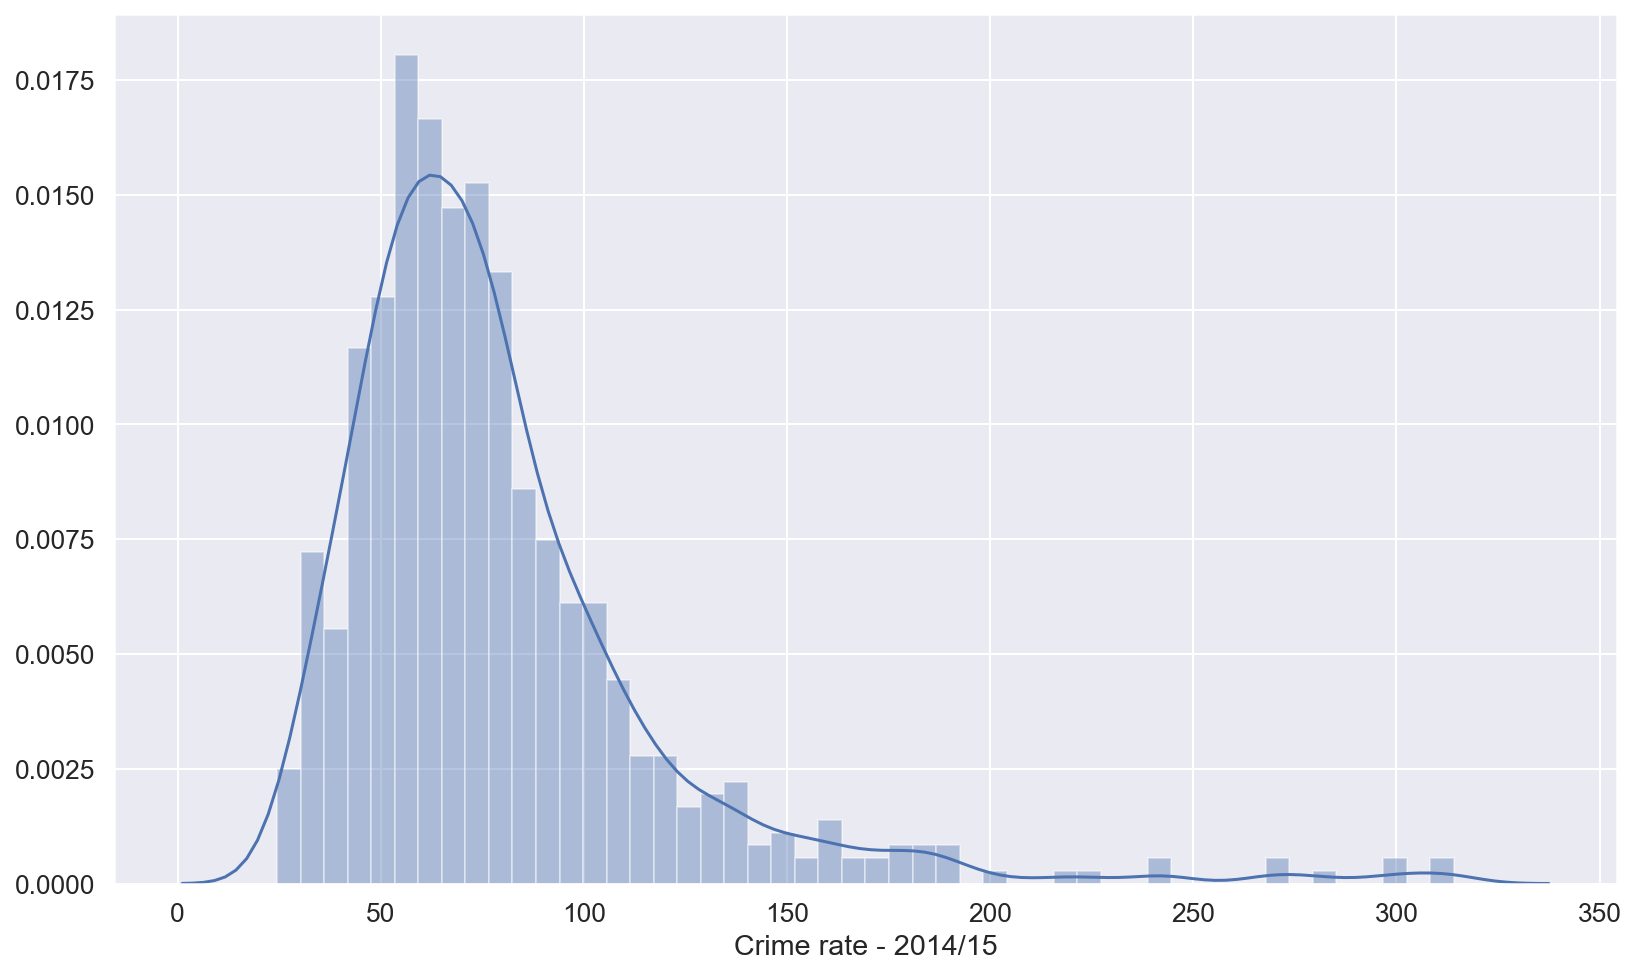

In [24]:
sns.set(font_scale=1.2)
sns.distplot(ward_data["Crime rate - 2014/15"],bins=50)
plt.gcf().set_size_inches(12,8)

# Multivariant Analysis

In [25]:
category = pd.cut(ward_data['Crime rate - 2014/15'],bins=[0,40,60,80,100,150,350], labels=['<40','40-60','60-80','80-100','100-150','>150'])
ward_data.insert(1,'Crime rate per 1000 people',category)

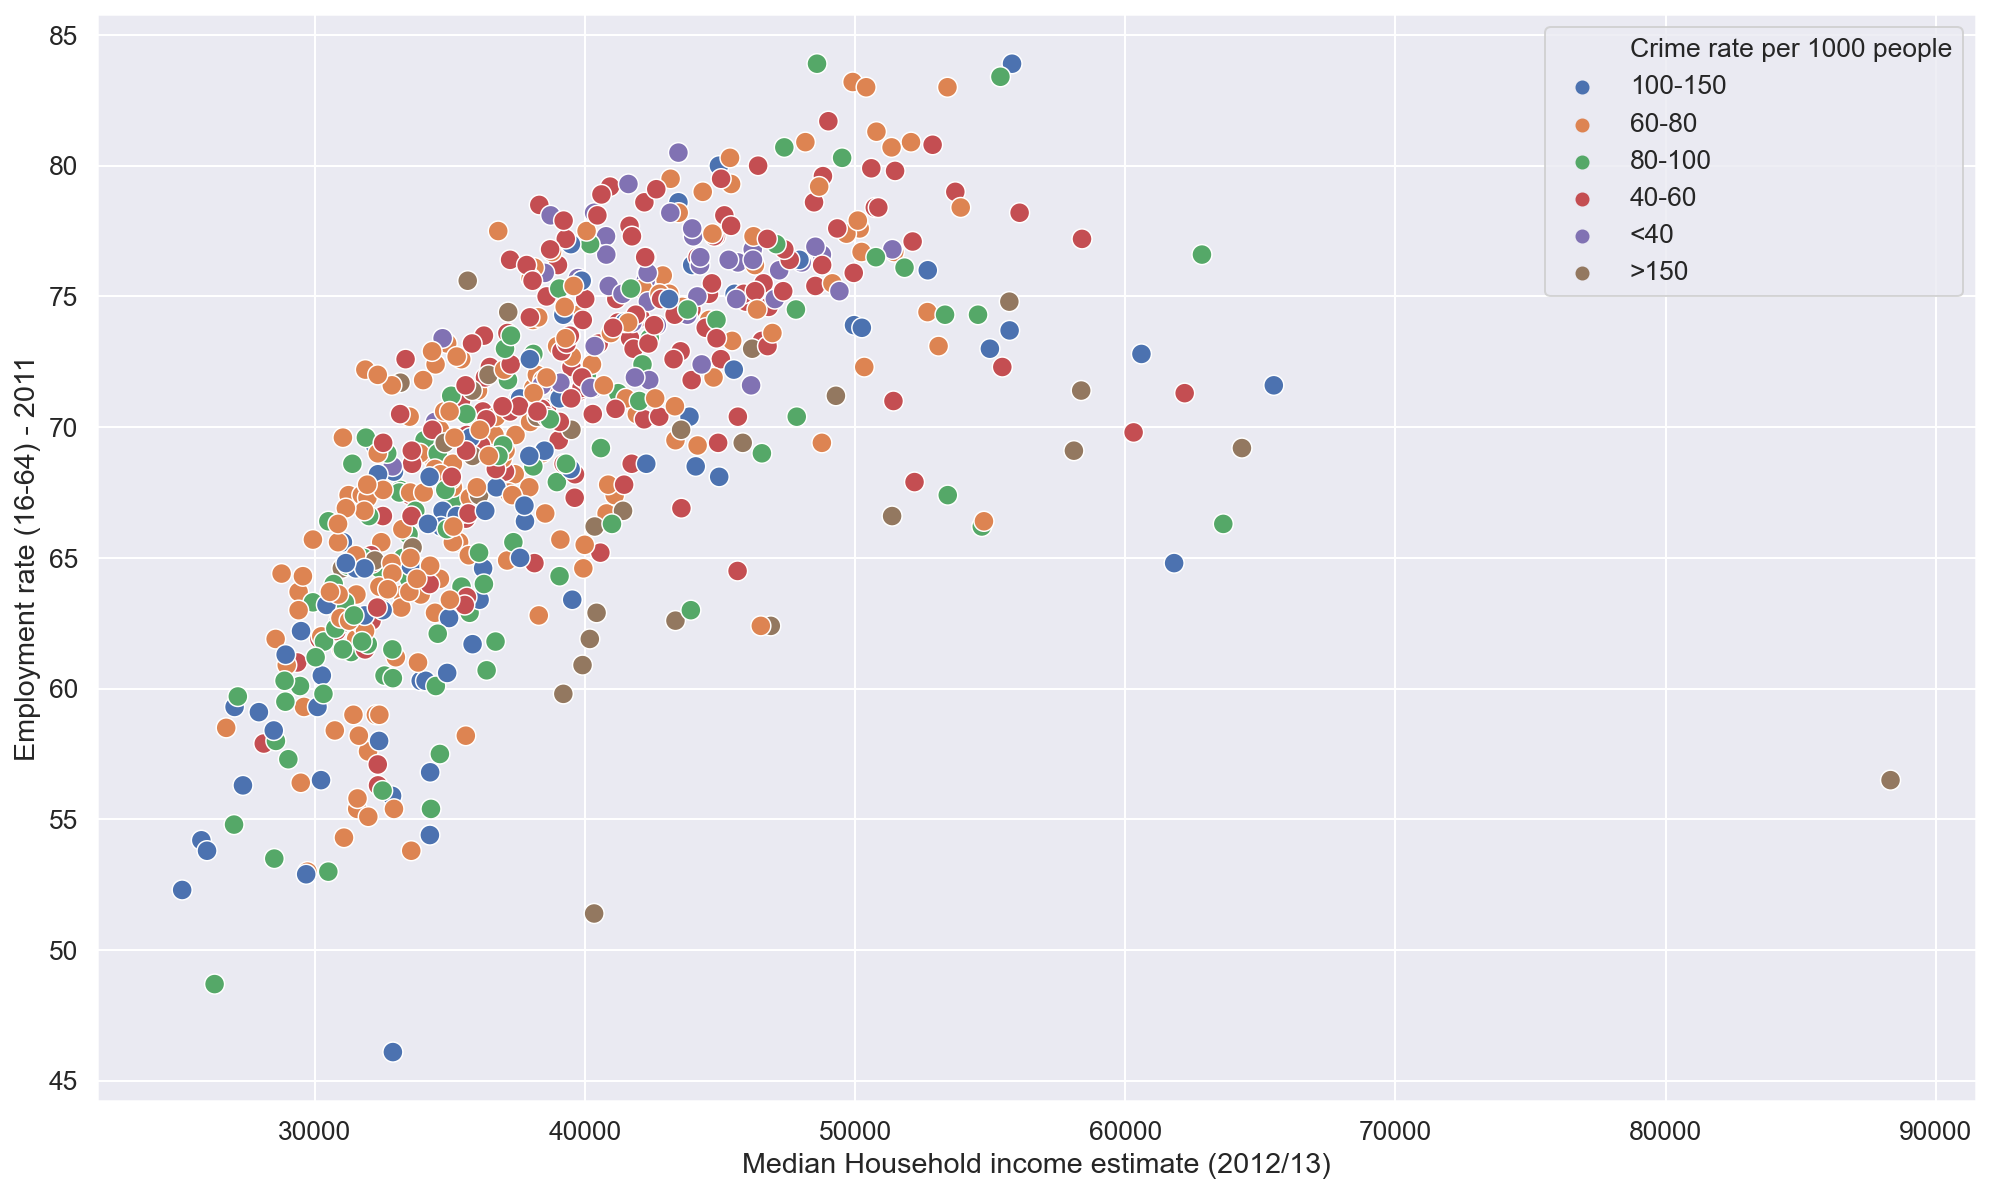

In [26]:
sns.set(font_scale=1.2)
sns.scatterplot(x="Median Household income estimate (2012/13)", y="Employment rate (16-64) - 2011", hue="Crime rate per 1000 people", s=100, data=ward_data)
plt.gcf().set_size_inches(15,10)

The scatter plot above highlights the challenge in predicting crime rates within London wards as there does not seem to be a clear relation between crime rate and employment rate or household income.

In [27]:
ward_data = ward_data.drop('Crime rate per 1000 people',axis=1)

# Geospatial Analysis

In [28]:
map_borough = gdp.read_file('London_Borough_Excluding_MHW.shp')

In [29]:
map_borough.head()

NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER SUB_2009  \
0  Kingston upon Thames  E09000021   3726.117       0.000         F     None   
1               Croydon  E09000008   8649.441       0.000         F     None   
2               Bromley  E09000006  15013.487       0.000         F     None   
3              Hounslow  E09000018   5658.541      60.755         F     None   
4                Ealing  E09000009   5554.428       0.000         F     None   

  SUB_2006                                           geometry  
0     None  POLYGON ((516401.600 160201.800, 516407.300 16...  
1     None  POLYGON ((535009.200 159504.700, 535005.500 15...  
2     None  POLYGON ((540373.600 157530.400, 540361.200 15...  
3     None  POLYGON ((521975.800 178100.000, 521967.700 17...  
4     None  POLYGON ((510253.500 182881.600, 510249.900 18...

In [30]:
map_data = borough_data[['Area_name','Happiness_score_2011-14_(out_of_10)', 'Anxiety_score_2011-14_(out_of_10)', 'Population_density_(per_hectare)_2017', 'Crime_rates_per_thousand_population_2014/15']]

# those are really terrible column names. let's rename them to something simpler
score = map_data.rename(index=str, columns={"Area_name": "Borough",
                                      "Happiness_score_2011-14_(out_of_10)": "Happiness",
                                      "Anxiety_score_2011-14_(out_of_10)": "Anxiety",
                                      "Population_density_(per_hectare)_2017": "Pop_density_per_hectare",
                                      "Crime_rates_per_thousand_population_2014/15": 'Crime_rate'})

# check dat dataframe
score.head()

Borough  Happiness  Anxiety  Pop_density_per_hectare  \
0        City of London        6.0      5.6                     30.3   
1  Barking and Dagenham        7.1      3.1                     57.9   
2                Barnet        7.4      2.8                     44.9   
3                Bexley        7.2      3.3                     40.3   
4                 Brent        7.2      2.9                     76.8   

   Crime_rate  
0         NaN  
1        83.4  
2        62.7  
3        51.8  
4        78.8

In [31]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_borough.set_index('NAME').join(score.set_index('Borough'))

merged["borough"] = merged.index
merged['borough'].replace({'Kingston upon Thames': 'Kingston', 'City of London': 'City', 'Kensington and Chelsea': 'Kensington', 'Hammersmith and Fulham': 'Hammersmith'}, inplace=True)
merged.head()

GSS_CODE   HECTARES  NONLD_AREA ONS_INNER SUB_2009  \
NAME                                                                        
Kingston upon Thames  E09000021   3726.117       0.000         F     None   
Croydon               E09000008   8649.441       0.000         F     None   
Bromley               E09000006  15013.487       0.000         F     None   
Hounslow              E09000018   5658.541      60.755         F     None   
Ealing                E09000009   5554.428       0.000         F     None   

                     SUB_2006  \
NAME                            
Kingston upon Thames     None   
Croydon                  None   
Bromley                  None   
Hounslow                 None   
Ealing                   None   

                                                               geometry  \
NAME                                                                      
Kingston upon Thames  POLYGON ((516401.600 160201.800, 516407.300 16...   
Croydon               POLYGON ((535009.200 159504.700, 535005.500 15...   
Bromley               POLYGON ((540373.600 157530.400, 540361.200 15...   
Hounslow              POLYGON ((521975.800 178100.000, 521967.700 17...   
Ealing                POLYGON ((510253.500 182881.600, 510249.900 18...   

                      Happiness  Anxiety  Pop_density_per_hectare  Crime_rate  \
NAME                                                                            
Kingston upon Thames        7.4      3.3                     47.1        58.5   
Croydon                     7.2      3.3                     44.7        77.0   
Bromley                     7.4      3.3                     21.8        64.1   
Hounslow                    7.4      3.4                     49.0        79.2   
Ealing                      7.3      3.6                     63.3        75.5   

                       borough  
NAME                            
Kingston upon Thames  Kingston  
Croydon                Croydon  
Bromley                Bromley  
Hounslow              Hounslow  
Ealing                  Ealing

C:\Users\Jack\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.



Text(0.5, 1.0, 'London Boroughs')

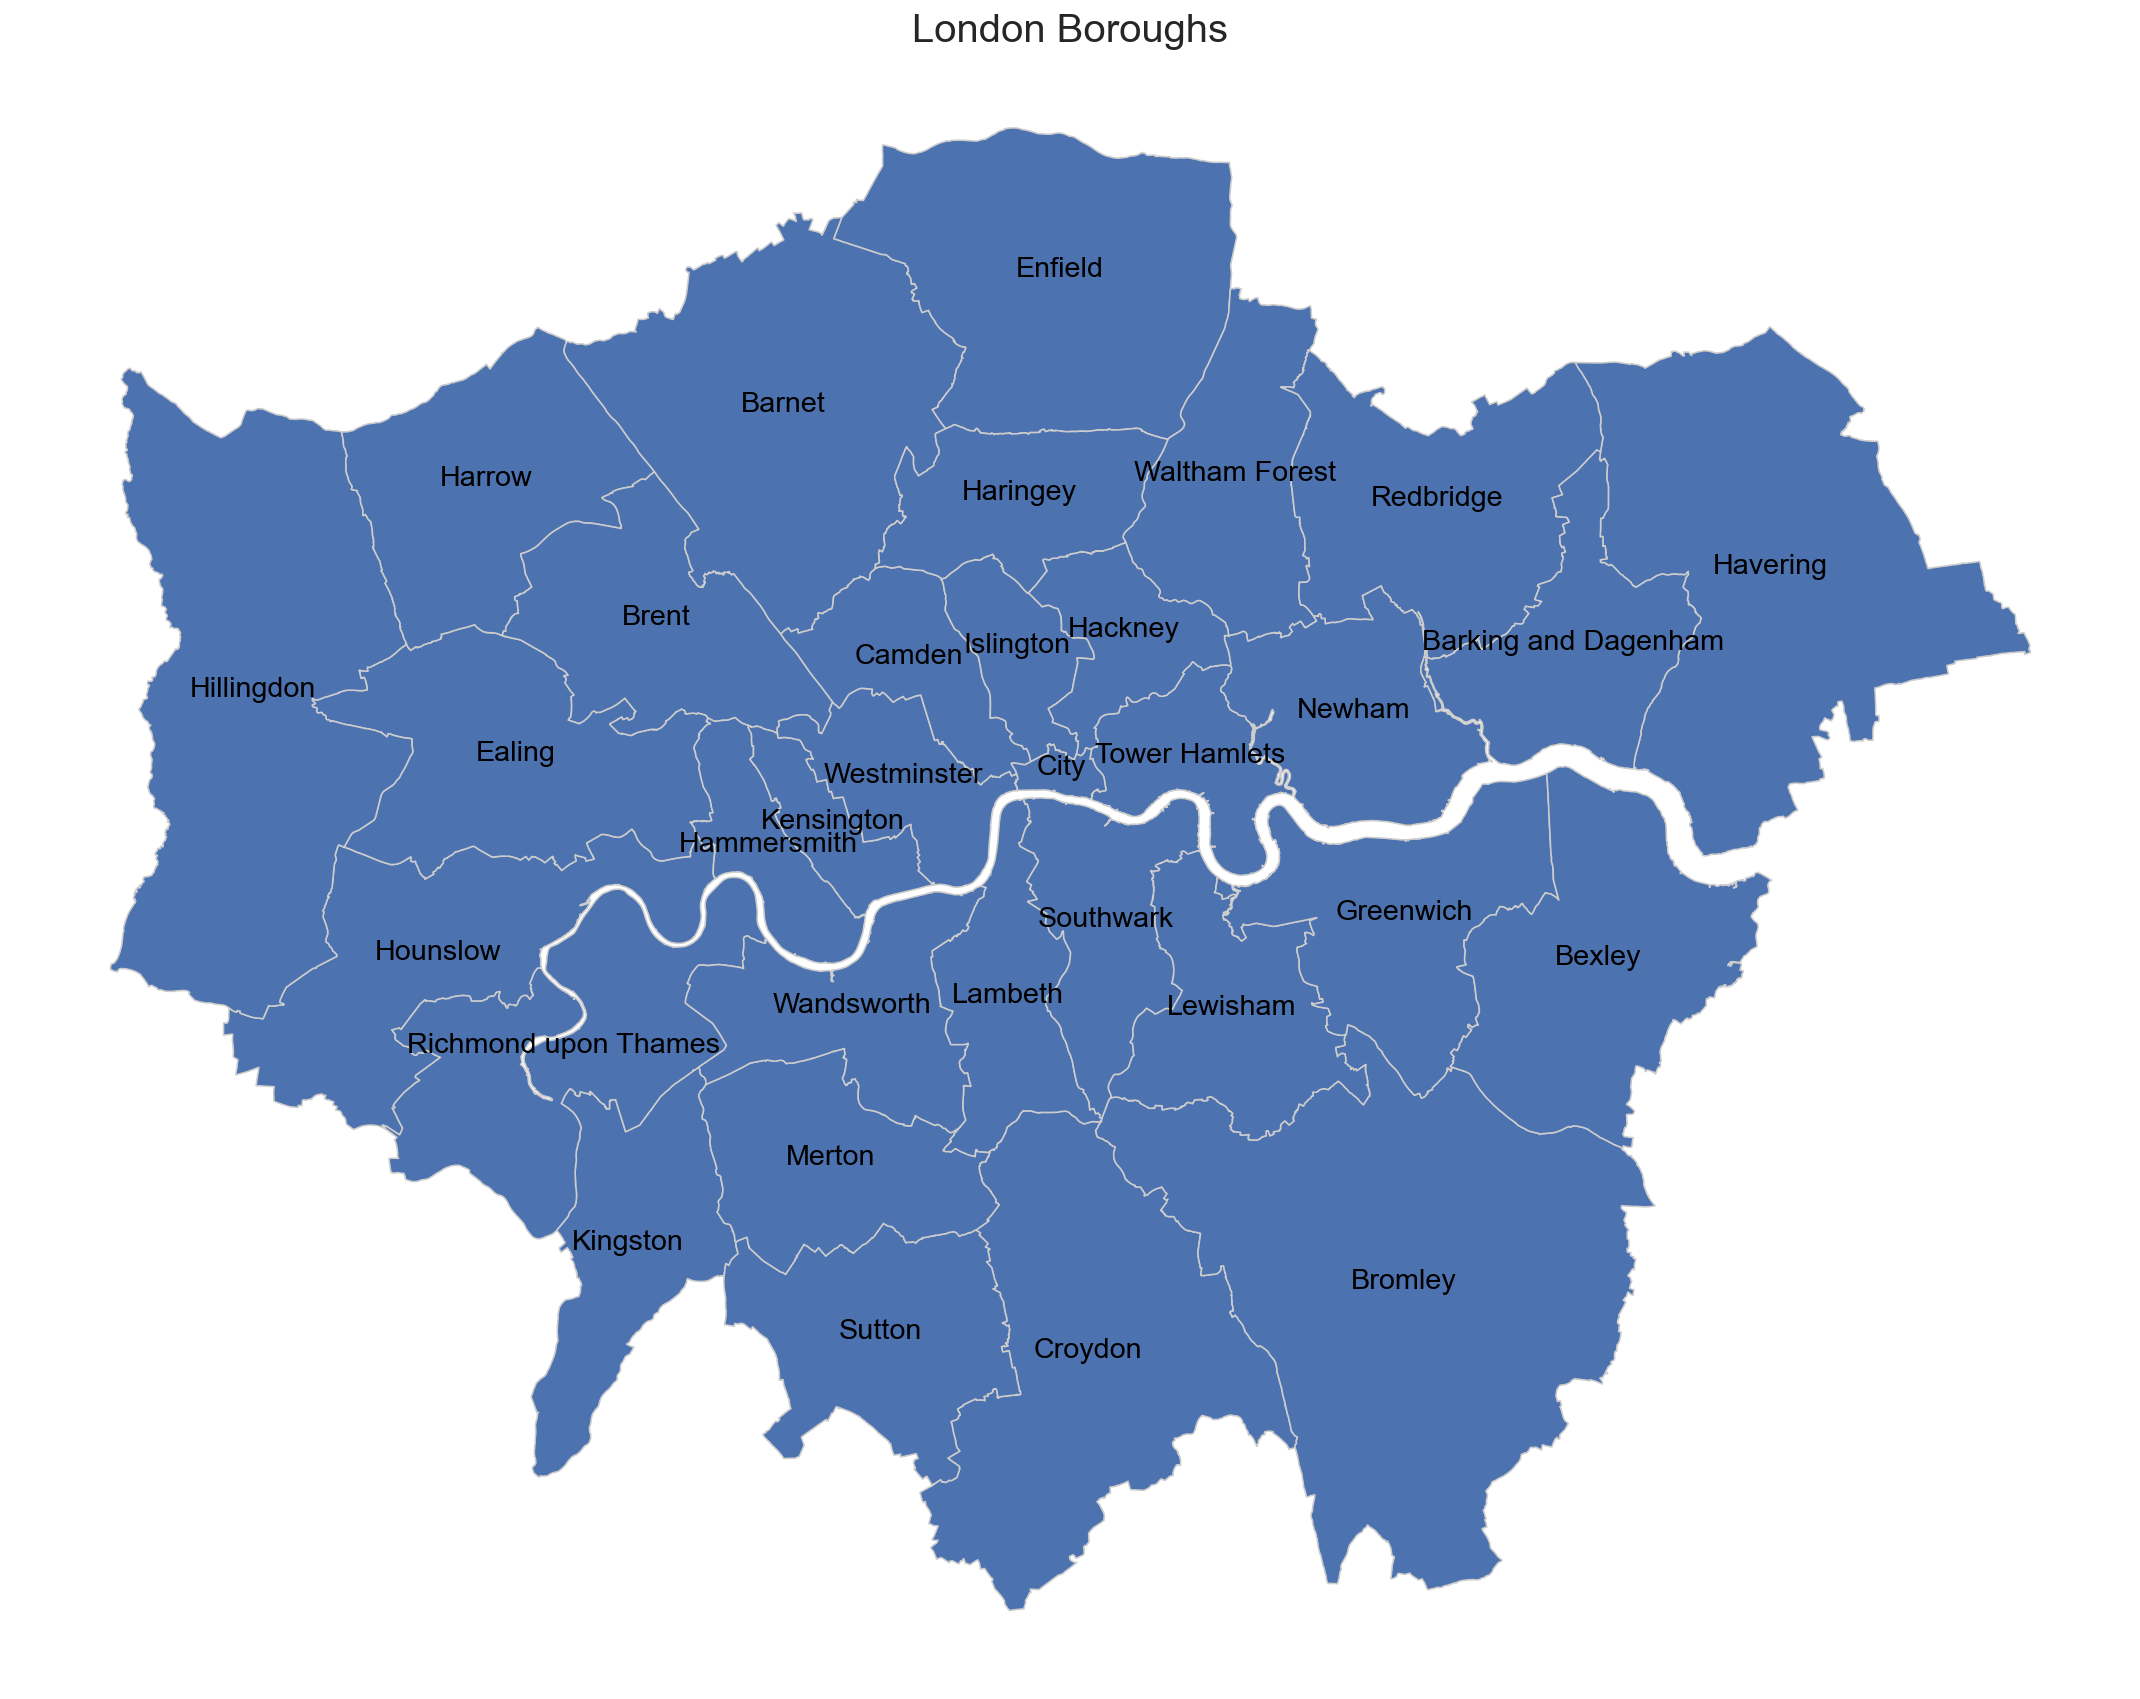

In [32]:
fig, ax = plt.subplots(1, figsize=(20, 15))
merged.plot(linewidth=0.8, ax=ax, edgecolor='0.8')
merged.apply(lambda x: ax.annotate(s=x.borough, color='black', xy=x.geometry.centroid.coords[0],ha='center'), axis=1)
ax.axis('off')
ax.set_title('London Boroughs', fontdict={'fontsize': '20','fontweight' : '3'})

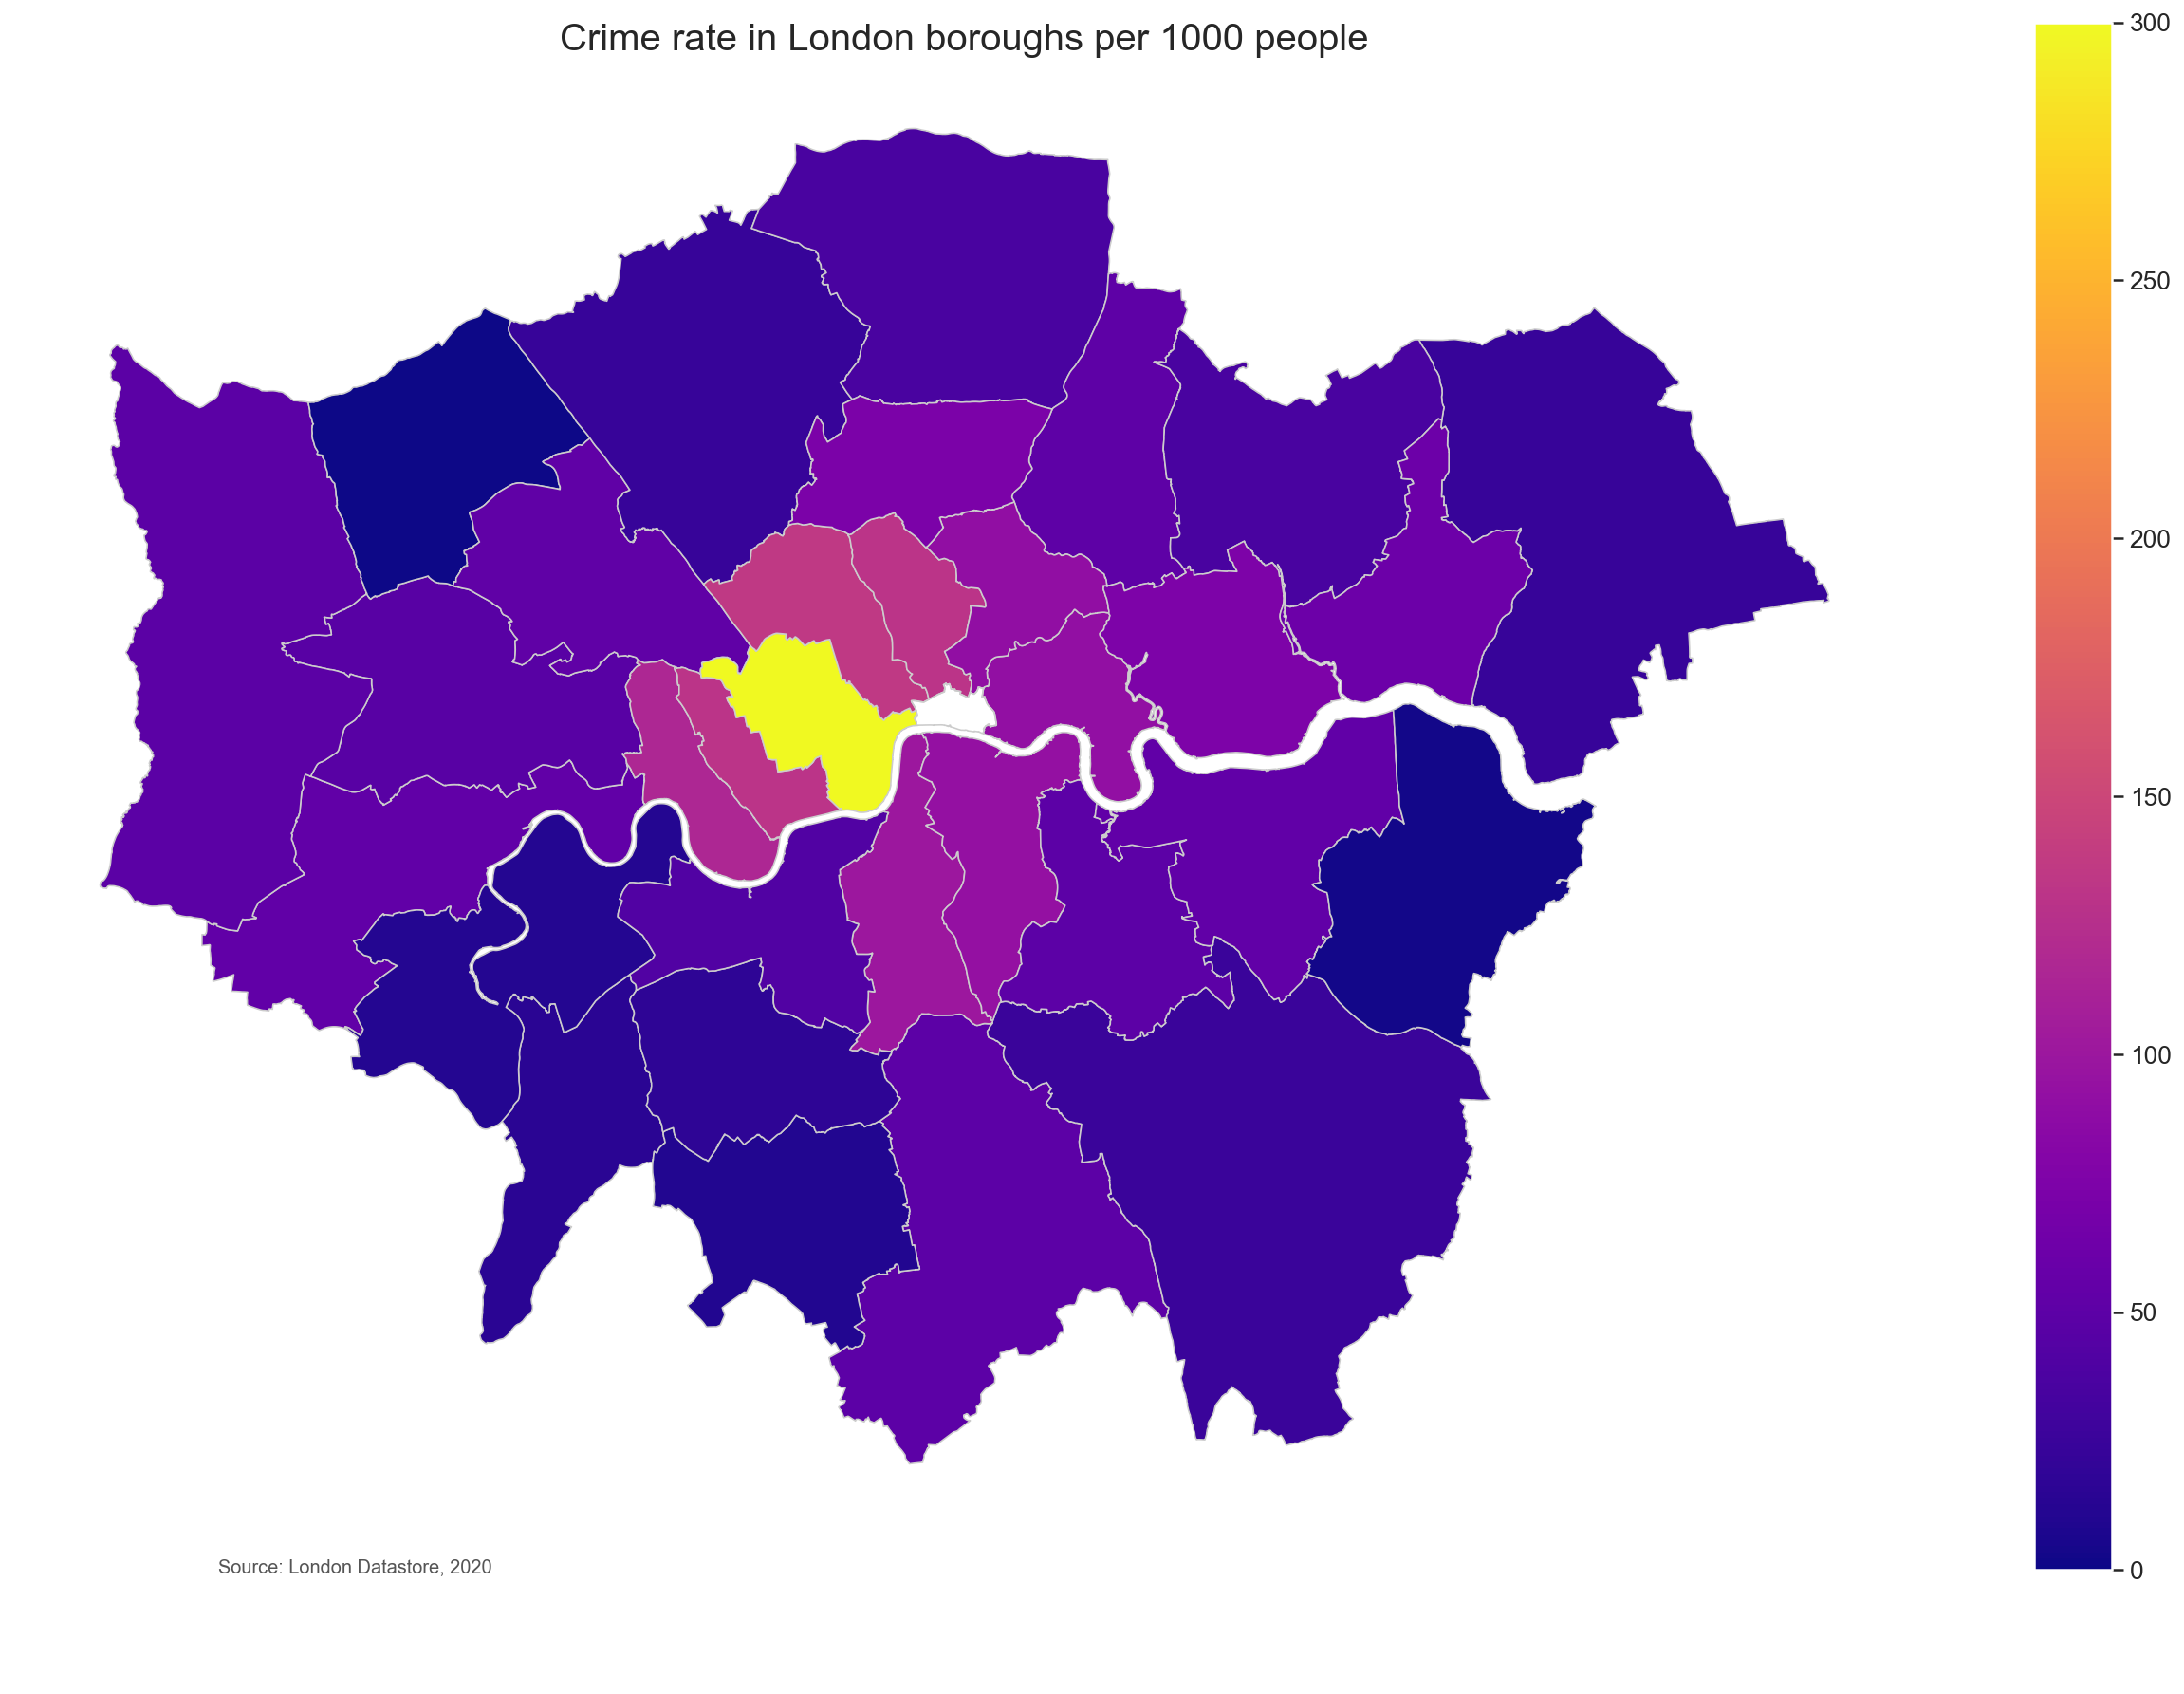

In [33]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Crime_rate'
# set the range for the choropleth
vmin, vmax = 0, 300
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 15))

# create map
merged.plot(column=variable, cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8')

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Crime rate in London boroughs per 1000 people', \
              fontdict={'fontsize': '20',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: London Datastore, 2020',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# Prediction Modelling

I will now predict crime rates in wards and examine the factors that have an important influence on crime.

## Feature Selection & Engineering

In [34]:
# In selecting features I will also drop variables which are direct measures of crime
# such as ambulance callouts and violence rates and ID2010 (Indices of deprivation)

X = ward_data.drop(['Ward name',
                    'Old code',
                    'New code',
                    'Crime rate - 2014/15',
                    'Rate of All Ambulance Incidents per 1,000 population - 2014',
                    'Rates of ambulance call outs for alcohol related illness - 2014',
                    'Violence against the person rate - 2014/15',
                    'Deliberate Fires per 1,000 population - 2014',
                    '(ID2010) - Rank of average score (within London) - 2010',
                    '(ID2010) % of LSOAs in worst 50% nationally - 2010']
                   ,axis=1)
y = ward_data['Crime rate - 2014/15']



<AxesSubplot:xlabel='Importance', ylabel='Features'>

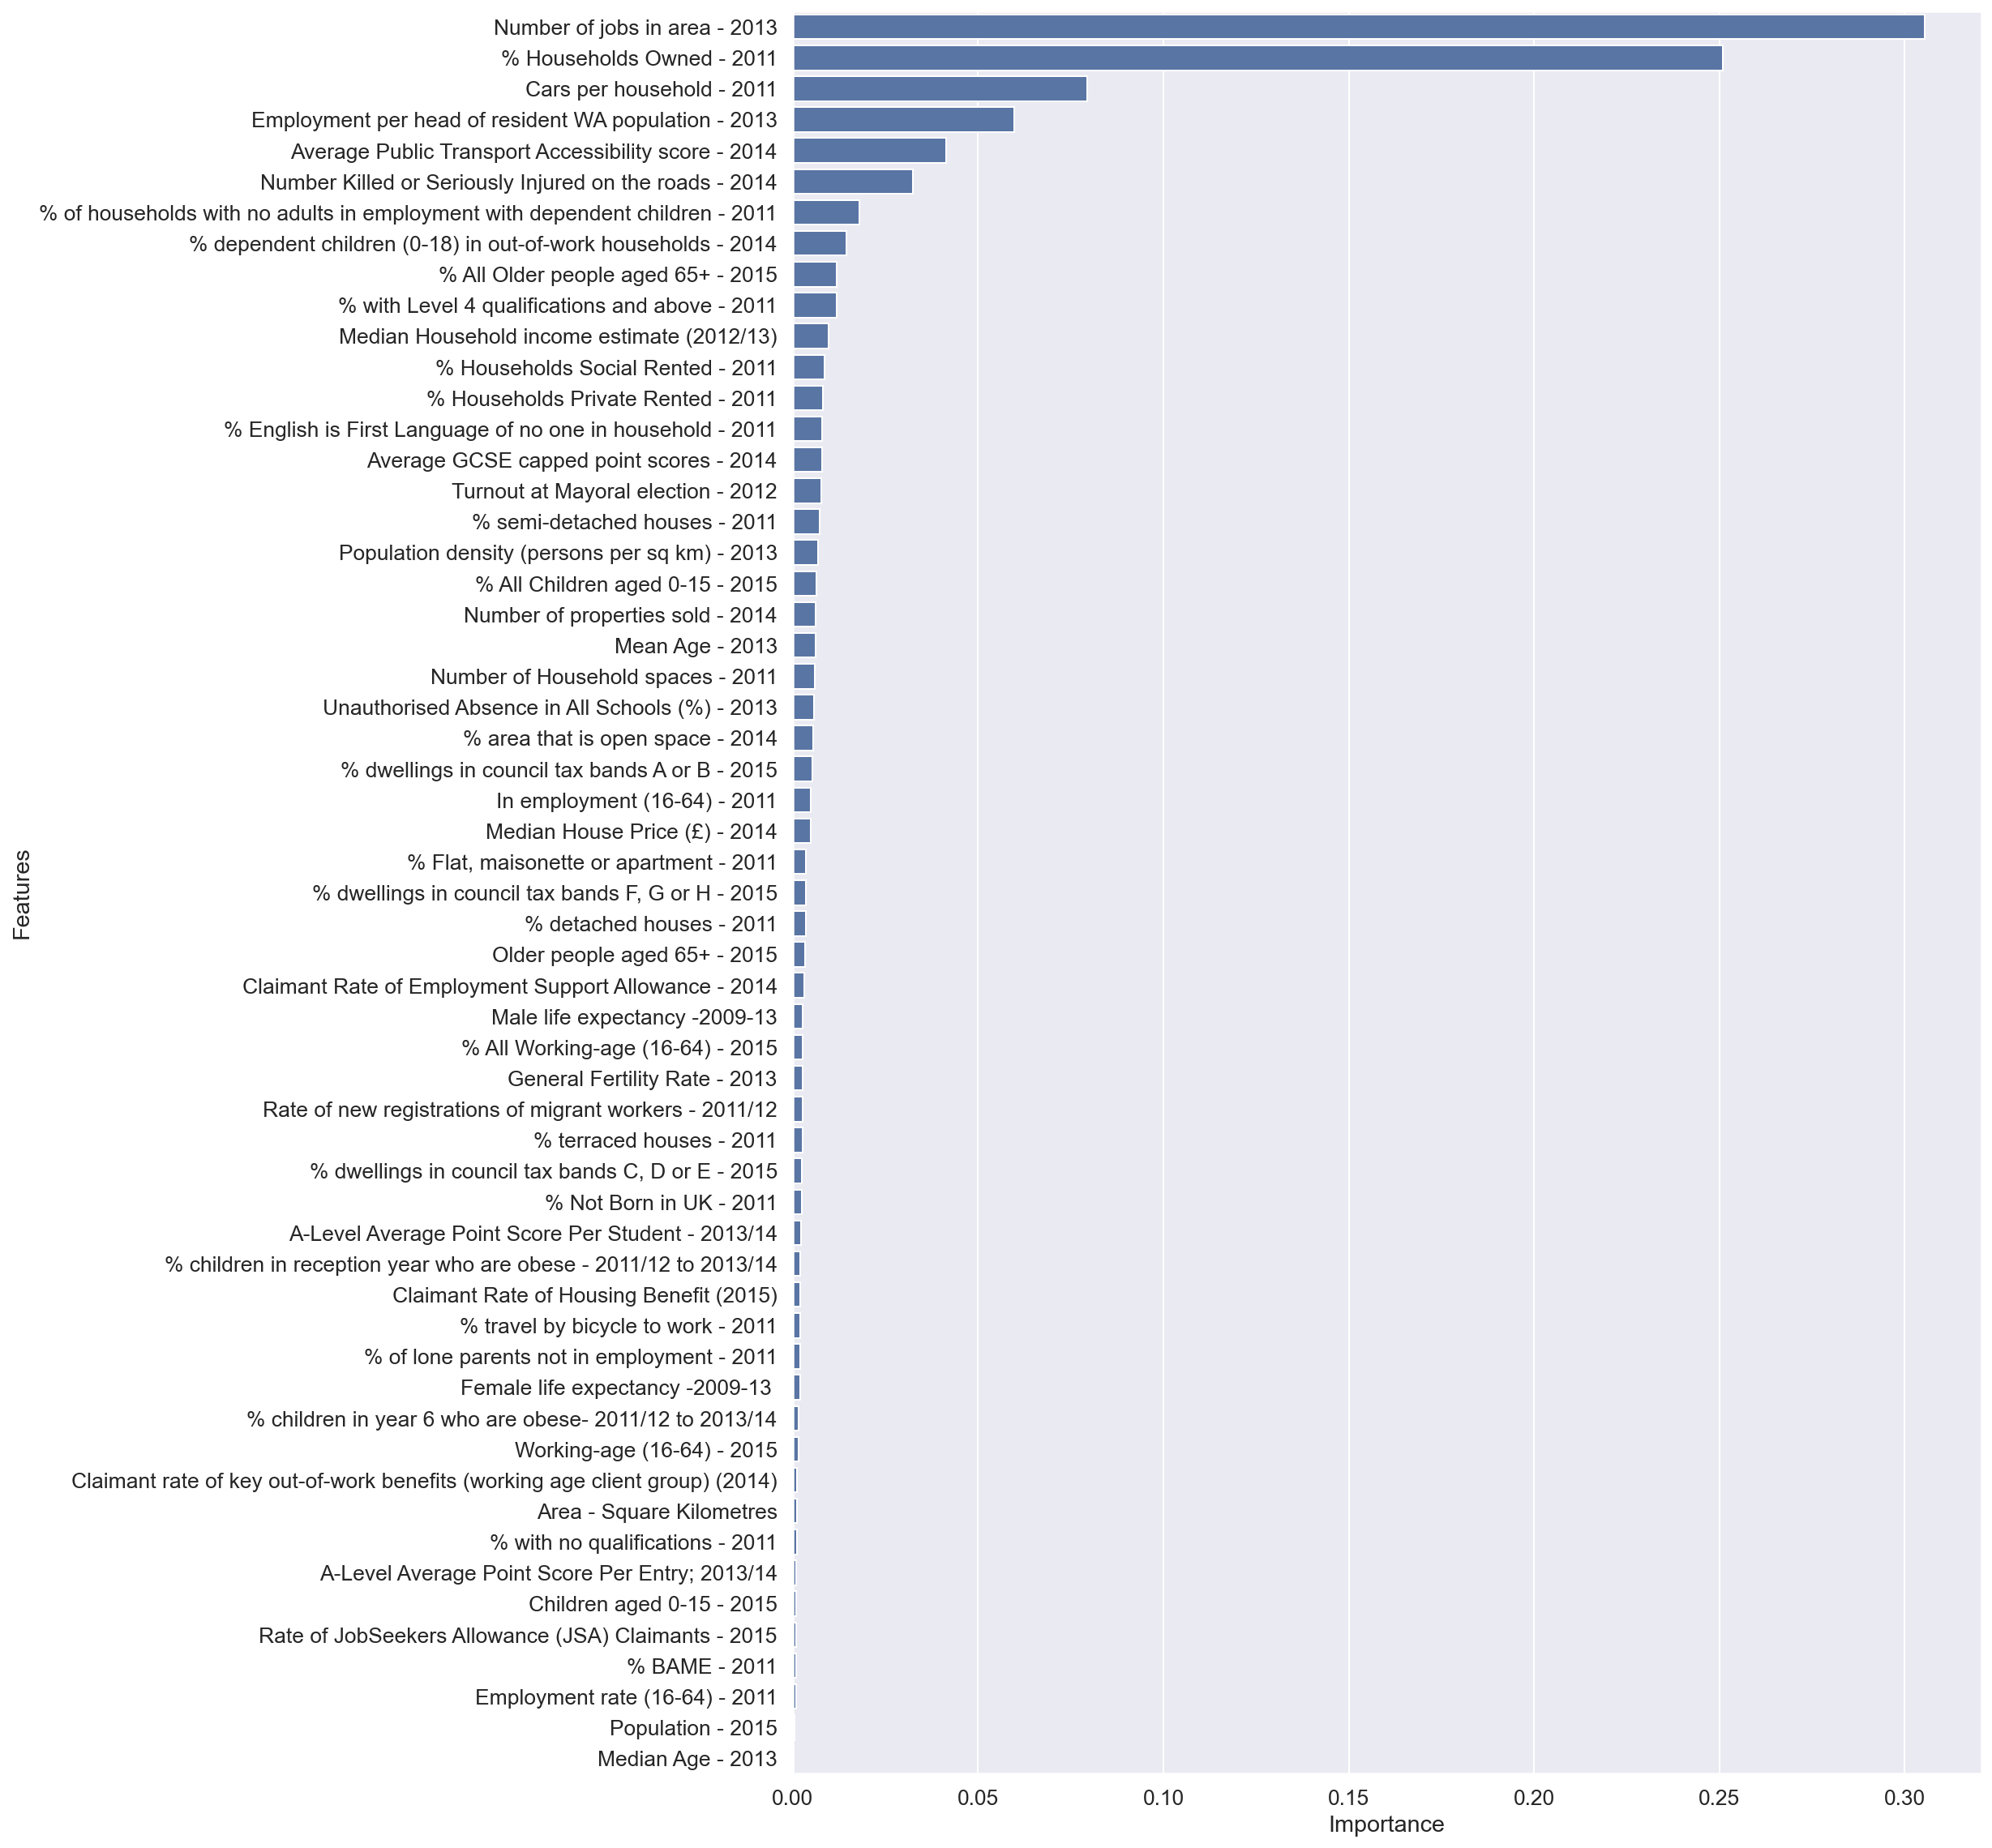

In [35]:
# Feature importance
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X, y)
imp = pd.DataFrame(xgb.feature_importances_ ,columns = ['Importance'],index = X.columns)
imp_sorted = imp.sort_values(['Importance'], ascending = False)
imp_sorted.index.name = 'Features'
imp_sorted.reset_index(inplace=True)

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 20)
sns.barplot(x="Importance", y="Features", data=imp_sorted, label="Alcohol-involved", color="b")

In [36]:
# Select 30 most important features 

important_features = imp_sorted.head(30).set_index('Features')
X = X[important_features.index]

<AxesSubplot:>

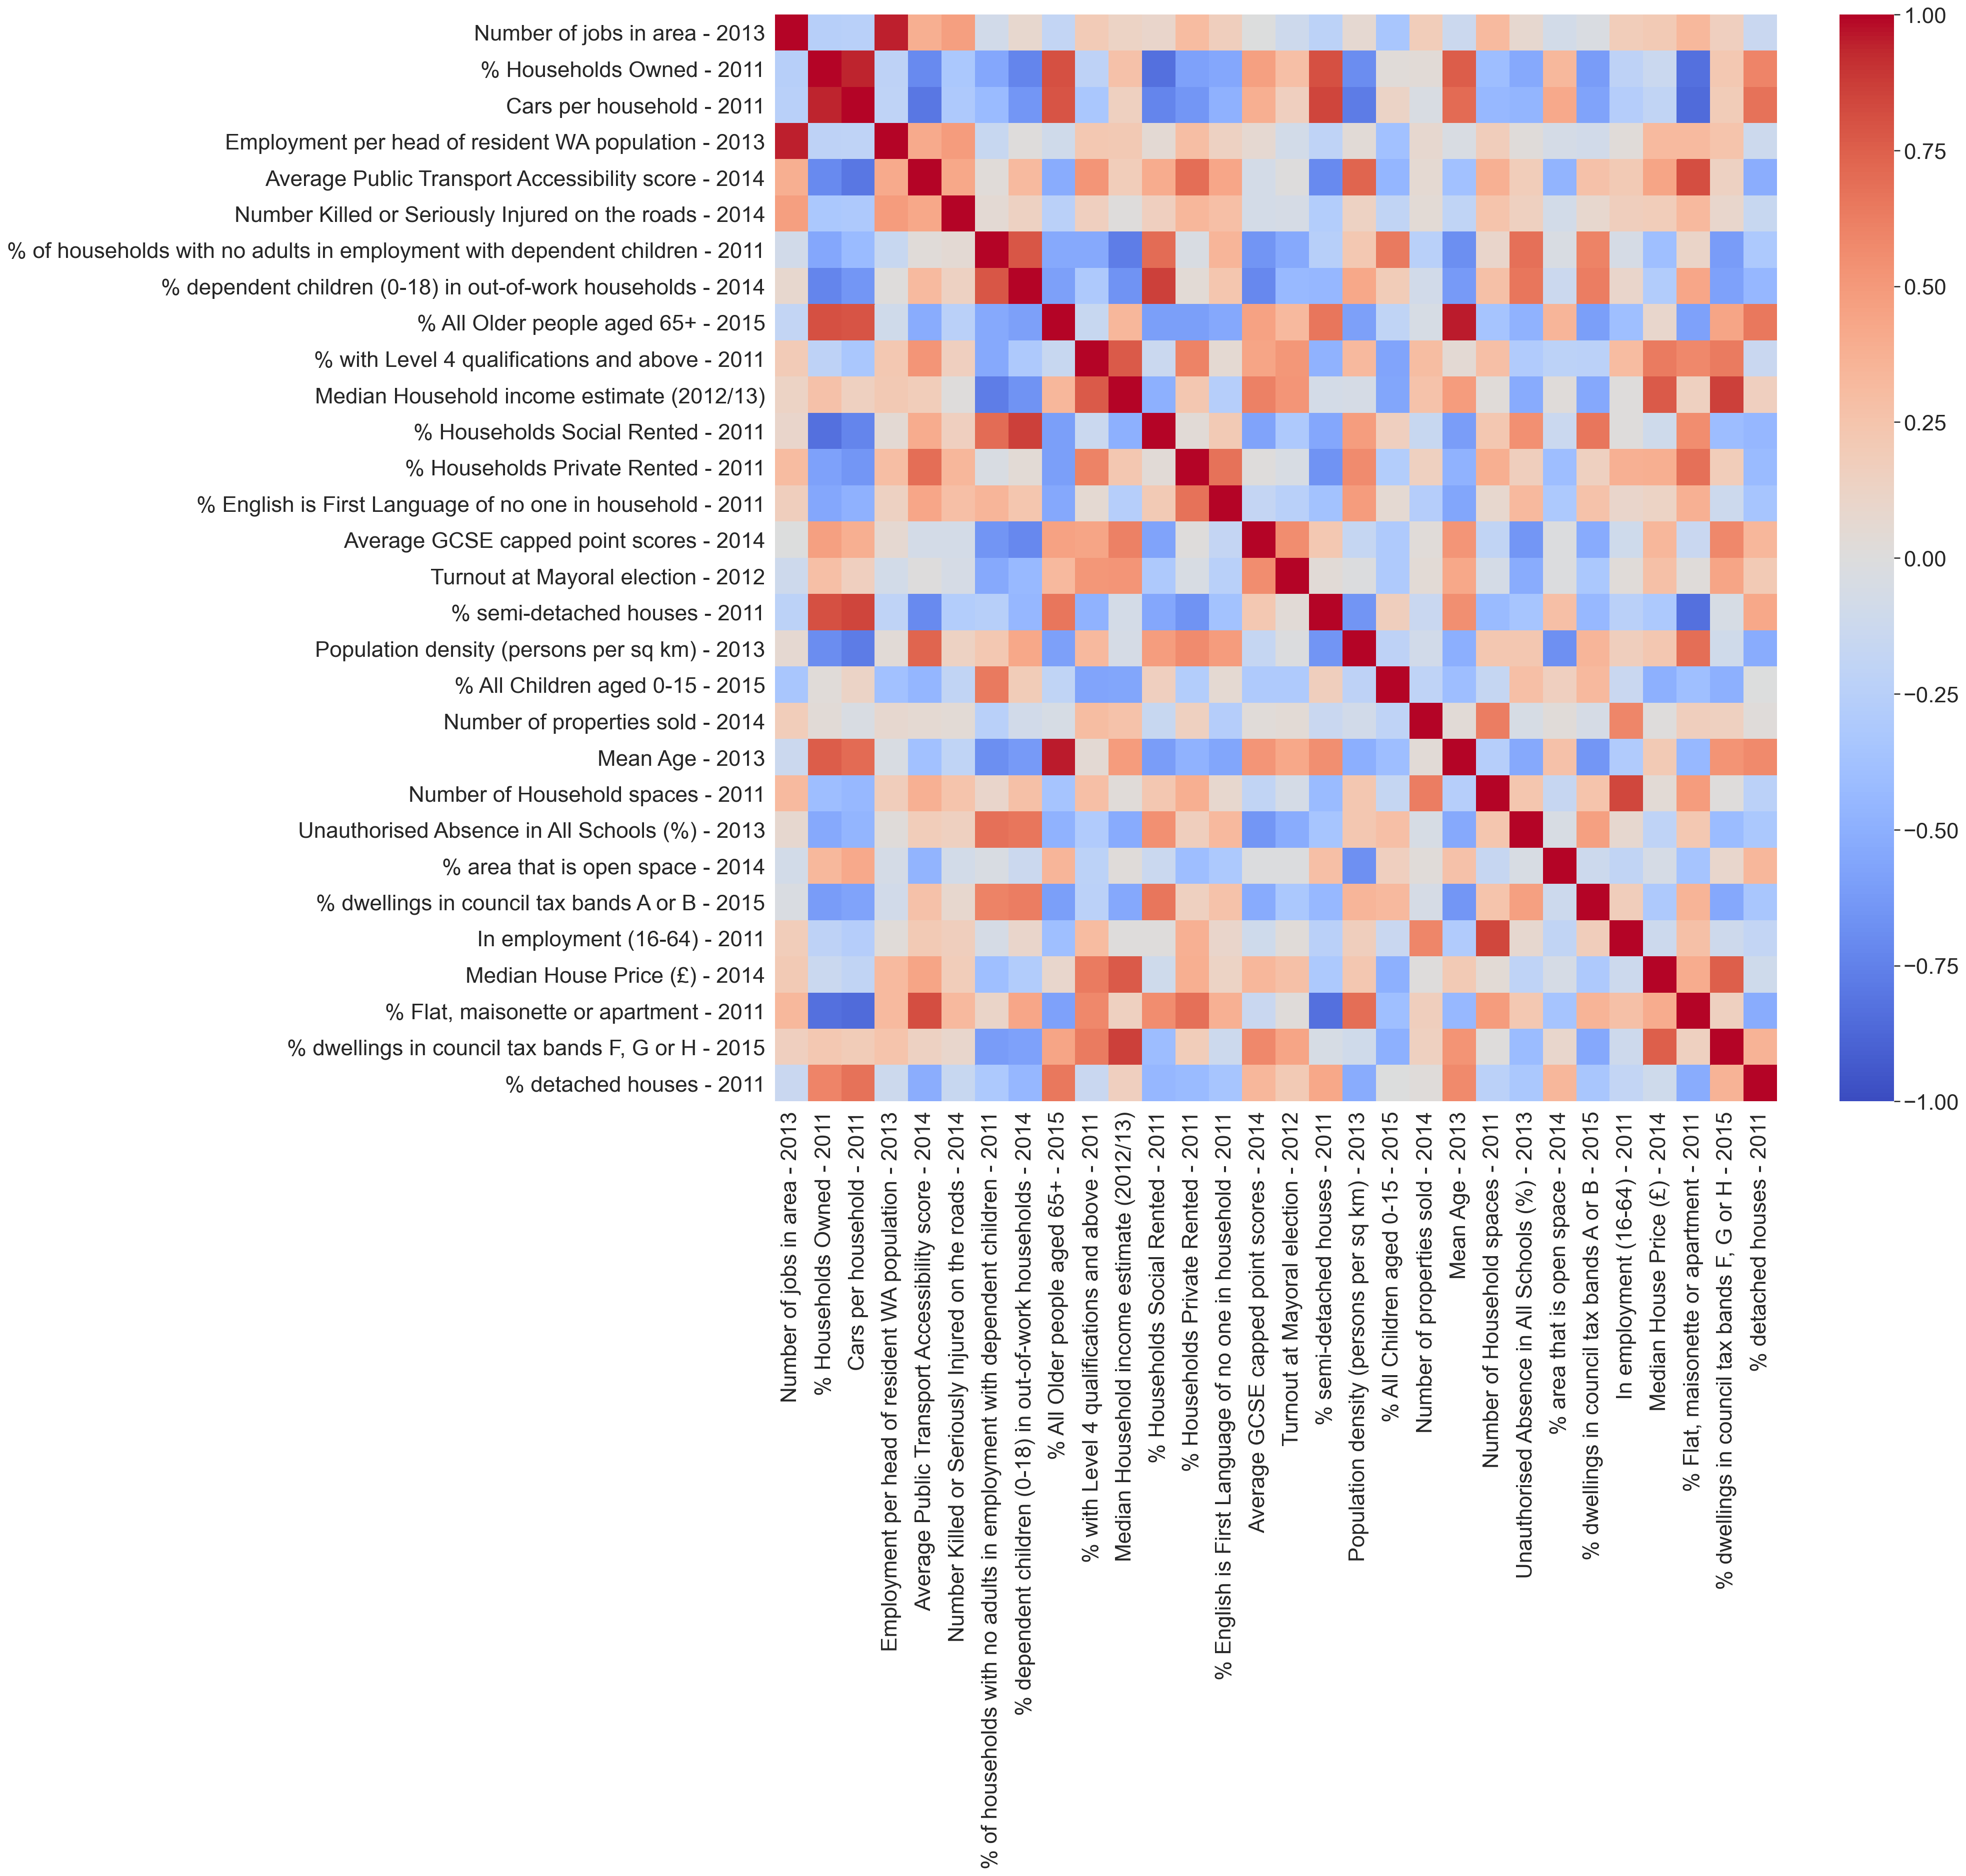

In [37]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set(font_scale=2)
sns.heatmap(X.corr(), annot = False, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Initial Modelling

In [40]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin = linreg.predict(X_test)

lin_r2 = (r2_score(y_test, y_pred_lin))
lin_MSE = (mean_squared_error(y_test, y_pred_lin))
lin_MAE = (mean_absolute_error(y_test, y_pred_lin))
lin_RMSE = (np.sqrt(mean_squared_error(y_test, y_pred_lin)))

print('R2: {:.2f}'.format(lin_r2))
print('MSE: {:.2f}'.format(lin_MSE))
print('MAE: {:.2f}'.format(lin_MAE))
print('RMSE: {:.2f}'.format(lin_RMSE))

R2: 0.53
MSE: 662.26
MAE: 15.82
RMSE: 25.73


In [41]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

dt_r2 = (r2_score(y_test, y_pred_dt))
dt_MSE = (mean_squared_error(y_test, y_pred_dt))
dt_MAE = (mean_absolute_error(y_test, y_pred_dt))
dt_RMSE = (np.sqrt(mean_squared_error(y_test, y_pred_dt)))

print('R2: {:.2f}'.format(dt_r2))
print('MSE: {:.2f}'.format(dt_MSE))
print('MAE: {:.2f}'.format(dt_MAE))
print('RMSE: {:.2f}'.format(dt_RMSE))

R2: 0.47
MSE: 758.78
MAE: 16.95
RMSE: 27.55


In [42]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_r2 = (r2_score(y_test, y_pred_knn))
knn_MSE = (mean_squared_error(y_test, y_pred_knn))
knn_MAE = (mean_absolute_error(y_test, y_pred_knn))
knn_RMSE = (np.sqrt(mean_squared_error(y_test, y_pred_knn)))

print('R2: {:.2f}'.format(knn_r2))
print('MSE: {:.2f}'.format(knn_MSE))
print('MAE: {:.2f}'.format(knn_MAE))
print('RMSE: {:.2f}'.format(knn_RMSE))

R2: 0.40
MSE: 848.68
MAE: 17.08
RMSE: 29.13


In [43]:
from sklearn.svm import SVR

svm = SVR()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

svm_r2 = (r2_score(y_test, y_pred_svm))
svm_MSE = (mean_squared_error(y_test, y_pred_svm))
svm_MAE = (mean_absolute_error(y_test, y_pred_svm))
svm_RMSE = (np.sqrt(mean_squared_error(y_test, y_pred_svm)))


print('R2: {:.2f}'.format(svm_r2))
print('MSE: {:.2f}'.format(svm_MSE))
print('MAE: {:.2f}'.format(svm_MAE))
print('RMSE: {:.2f}'.format(svm_RMSE))

R2: 0.24
MSE: 1078.67
MAE: 19.22
RMSE: 32.84


In [44]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_r2 = (r2_score(y_test, y_pred_rf))
rf_MSE = (mean_squared_error(y_test, y_pred_rf))
rf_MAE = (mean_absolute_error(y_test, y_pred_rf))
rf_RMSE = (np.sqrt(mean_squared_error(y_test, y_pred_rf)))

print('R2: {:.2f}'.format(rf_r2))
print('MSE: {:.2f}'.format(rf_MSE))
print('MAE: {:.2f}'.format(rf_MAE))
print('RMSE: {:.2f}'.format(rf_RMSE))

R2: 0.59
MSE: 579.43
MAE: 14.18
RMSE: 24.07


In [45]:
from sklearn.linear_model import Lasso

las = Lasso()
las.fit(X_train, y_train)
y_pred_las = las.predict(X_test)

las_r2 = (r2_score(y_test, y_pred_las))
las_MSE = (mean_squared_error(y_test, y_pred_las))
las_MAE = (mean_absolute_error(y_test, y_pred_las))
las_RMSE = (np.sqrt(mean_squared_error(y_test, y_pred_las)))

print('R2: {:.2f}'.format(las_r2))
print('MSE: {:.2f}'.format(las_MSE))
print('MAE: {:.2f}'.format(las_MAE))
print('RMSE: {:.2f}'.format(las_RMSE))

R2: 0.52
MSE: 675.49
MAE: 15.24
RMSE: 25.99


In [46]:
from sklearn.linear_model import Ridge

rr = Ridge()
rr.fit(X_train, y_train)
y_pred_rr = rr.predict(X_test)

rr_r2 = (r2_score(y_test, y_pred_rr))
rr_MSE = (mean_squared_error(y_test, y_pred_rr))
rr_MAE = (mean_absolute_error(y_test, y_pred_rr))
rr_RMSE = (np.sqrt(mean_squared_error(y_test, y_pred_rr)))

print('R2: {:.2f}'.format(rr_r2))
print('MSE: {:.2f}'.format(rr_MSE))
print('MAE: {:.2f}'.format(rr_MAE))
print('RMSE: {:.2f}'.format(rr_RMSE))

R2: 0.53
MSE: 663.47
MAE: 15.82
RMSE: 25.76


In [47]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)
y_pred_etr = etr.predict(X_test)

etr_r2 = (r2_score(y_test, y_pred_etr))
etr_MSE = (mean_squared_error(y_test, y_pred_etr))
etr_MAE = (mean_absolute_error(y_test, y_pred_etr))
etr_RMSE = (np.sqrt(mean_squared_error(y_test, y_pred_etr)))

print('R2: {:.2f}'.format(etr_r2))
print('MSE: {:.2f}'.format(etr_MSE))
print('MAE: {:.2f}'.format(etr_MAE))
print('RMSE: {:.2f}'.format(etr_RMSE))

R2: 0.55
MSE: 634.26
MAE: 14.50
RMSE: 25.18


In [48]:
from sklearn.ensemble import AdaBoostRegressor 

abr = AdaBoostRegressor()
abr.fit(X_train, y_train)
y_pred_abr = abr.predict(X_test)

abr_r2 = (r2_score(y_test, y_pred_abr))
abr_MSE = (mean_squared_error(y_test, y_pred_abr))
abr_MAE = (mean_absolute_error(y_test, y_pred_abr))
abr_RMSE = (np.sqrt(mean_squared_error(y_test, y_pred_abr)))

print('R2: {:.2f}'.format(abr_r2))
print('MSE: {:.2f}'.format(abr_MSE))
print('MAE: {:.2f}'.format(abr_MAE))
print('RMSE: {:.2f}'.format(abr_RMSE))

R2: 0.50
MSE: 712.69
MAE: 17.26
RMSE: 26.70


In [49]:
from sklearn.ensemble import GradientBoostingRegressor 

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

gbr_r2 = (r2_score(y_test, y_pred_gbr))
gbr_MSE = (mean_squared_error(y_test, y_pred_gbr))
gbr_MAE = (mean_absolute_error(y_test, y_pred_gbr))
gbr_RMSE = (np.sqrt(mean_squared_error(y_test, y_pred_gbr)))

print('R2: {:.2f}'.format(gbr_r2))
print('MSE: {:.2f}'.format(gbr_MSE))
print('MAE: {:.2f}'.format(gbr_MAE))
print('RMSE: {:.2f}'.format(gbr_RMSE))

R2: 0.60
MSE: 570.13
MAE: 14.31
RMSE: 23.88


In [50]:
from xgboost import XGBRegressor

xg = XGBRegressor(colsample_bytree = 0.5, alpha = 30, n_estimators = 7)
xg.fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)

xg_r2 = (r2_score(y_test, y_pred_xg))
xg_MSE = (mean_squared_error(y_test, y_pred_xg))
xg_MAE = (mean_absolute_error(y_test, y_pred_xg))
xg_RMSE = (np.sqrt(mean_squared_error(y_test, y_pred_xg)))

print('R2: {:.2f}'.format(xg_r2))
print('MSE: {:.2f}'.format(xg_MSE))
print('MAE: {:.2f}'.format(xg_MAE))
print('RMSE: {:.2f}'.format(xg_RMSE))

R2: 0.46
MSE: 765.55
MAE: 16.65
RMSE: 27.67


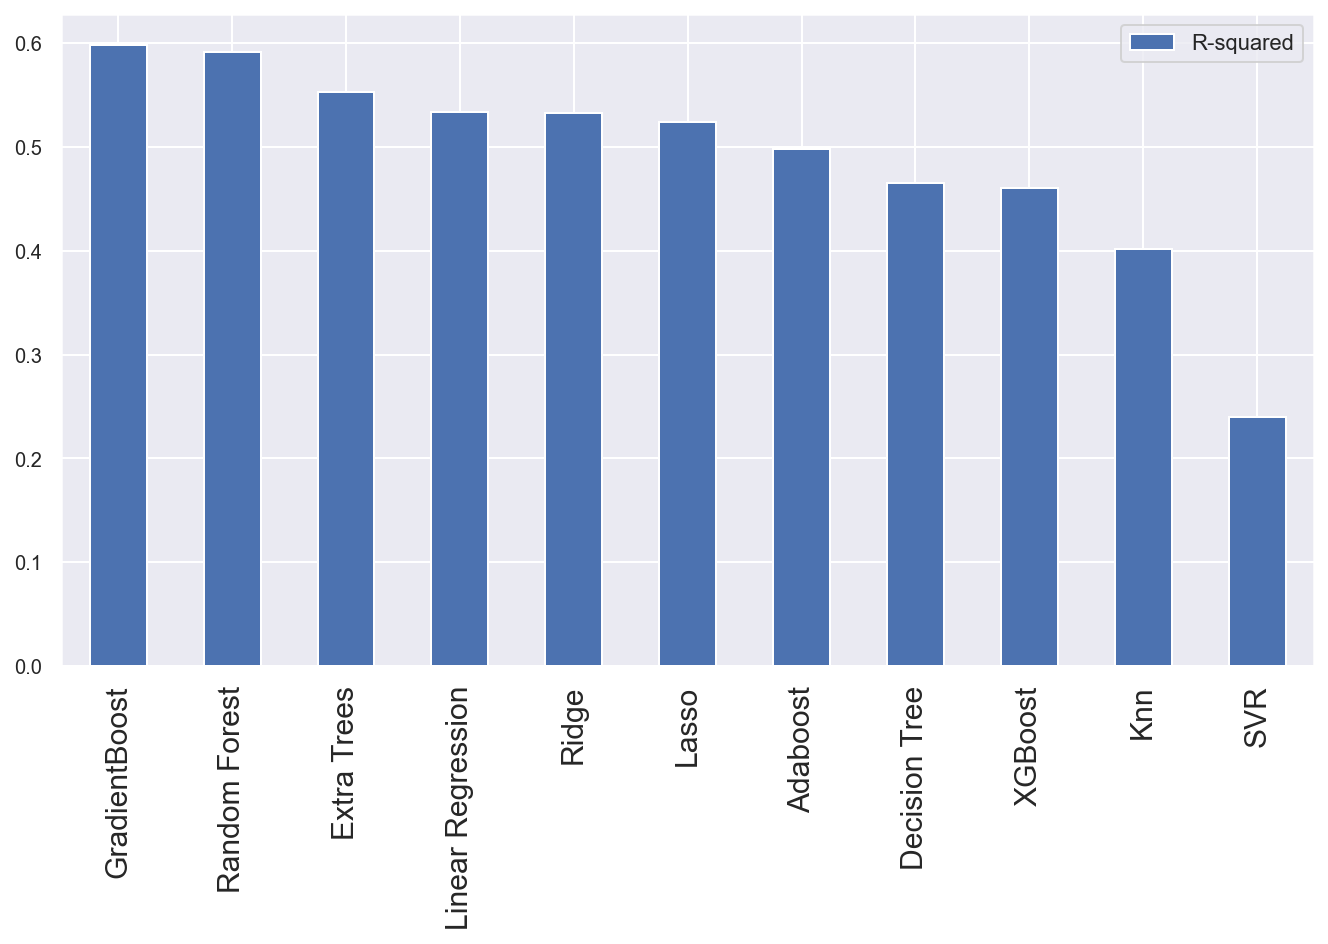

In [51]:
R2=[lin_r2,dt_r2,knn_r2,svm_r2,rf_r2,las_r2,rr_r2,etr_r2,abr_r2,gbr_r2,xg_r2]
col={'R-squared':R2}
models=['Linear Regression','Decision Tree','Knn','SVR','Random Forest','Lasso','Ridge','Extra Trees','Adaboost','GradientBoost','XGBoost']
df= pd.DataFrame(data=col,index=models)
df.sort_values(by='R-squared', ascending = False, inplace = True)
df.plot(kind='bar')
plt.legend(fontsize = 11)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 10)
plt.gcf().set_size_inches(10, 6)

As perhaps would be expected, the ensmeble random forests seem to perform best with graident boosted trees model the best performer. I will now try an improve performance of this model.

### Hyperparameter Testing on best-performing models

### Gradient Boosting Regressor

In [52]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [1,5,10],
          'max_depth': [1,3,5],
          'max_features': [5,10,20],
          'min_samples_split': [1,5,10],
          'min_samples_leaf': [1,3,5],
          'learning_rate': [0.25, 0.1],
          }

gbr_gs = GradientBoostingRegressor()
gbr_gs = GridSearchCV(estimator=gbr_gs, param_grid=params, n_jobs=-1, verbose=3, scoring='neg_mean_squared_error')
gbr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:    6.6s finished


GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.25, 0.1], 'max_depth': [1, 3, 5],
                         'max_features': [5, 10, 20],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [1, 5, 10],
                         'n_estimators': [1, 5, 10]},
             scoring='neg_mean_squared_error', verbose=3)

In [53]:
gbr_gs.best_estimator_

GradientBoostingRegressor(learning_rate=0.25, max_depth=5, max_features=20,
                          min_samples_leaf=5, min_samples_split=5,
                          n_estimators=10)

In [54]:
y_pred_gbr_gs = gbr_gs.predict(X_test)
y_pred_gbr_gs_train = gbr_gs.predict(X_train)

gbr_gs_r2 = (r2_score(y_test, y_pred_gbr_gs))
gbr_gs_MSE = (mean_squared_error(y_test, y_pred_gbr_gs))
gbr_gs_MAE = (mean_absolute_error(y_test, y_pred_gbr_gs))
gbr_gs_RMSE = (np.sqrt(mean_squared_error(y_test, y_pred_gbr_gs)))

print('R2: {:.2f}'.format(gbr_gs_r2))
print('MSE: {:.2f}'.format(gbr_gs_MSE))
print('MAE: {:.2f}'.format(gbr_gs_MAE))
print('RMSE: {:.2f}'.format(gbr_gs_RMSE))

R2: 0.60
MSE: 563.75
MAE: 15.01
RMSE: 23.74


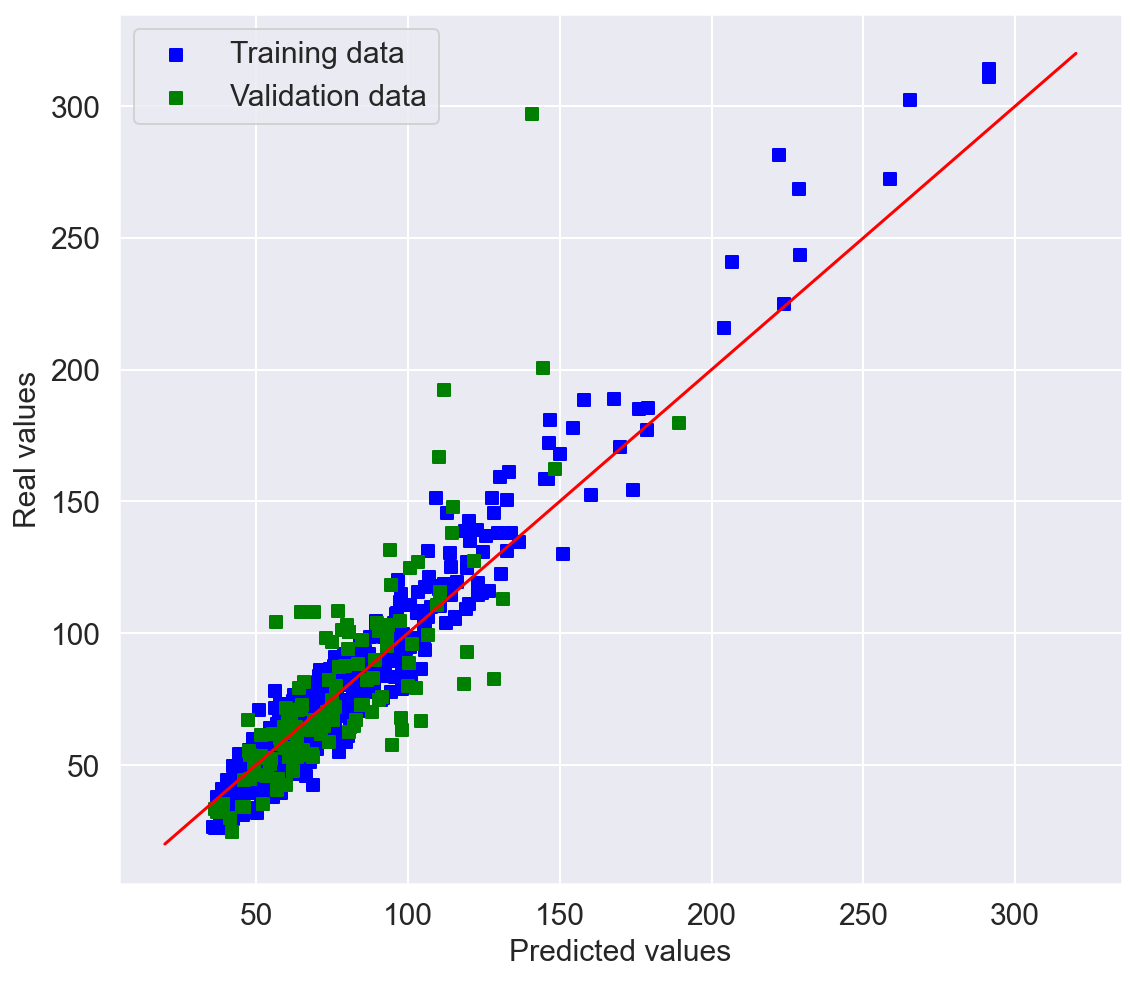

In [55]:
# Plot predictions
plt.figure(figsize=(8,8))
plt.scatter(y_pred_gbr_gs_train, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_pred_gbr_gs, y_test, c = "green", marker = "s", label = "Validation data")
plt.xlabel("Predicted values", fontsize = 15)
plt.ylabel("Real values", fontsize = 15)
plt.legend(loc = "upper left", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot([20, 320], [20, 320], c = "red")
plt.show()

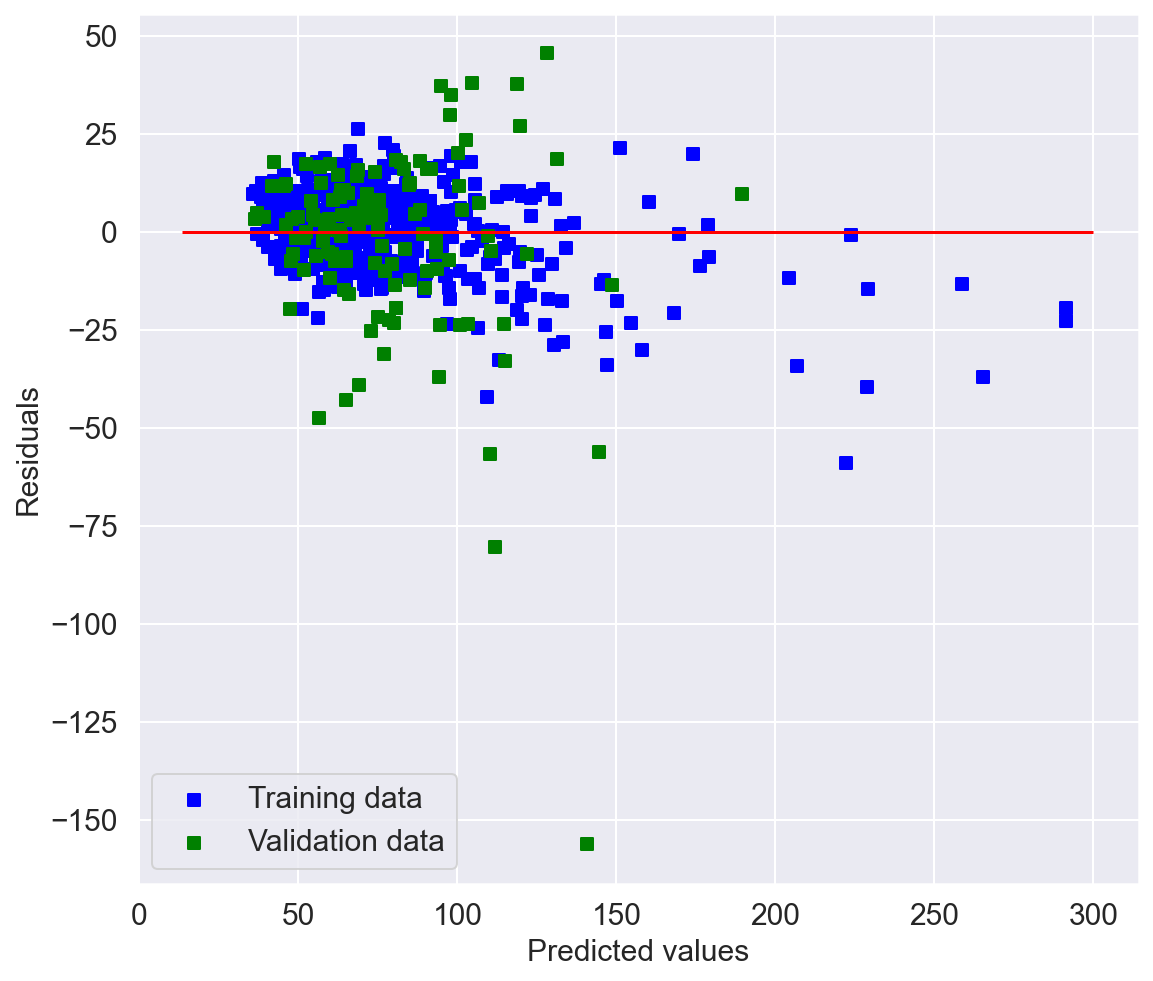

In [56]:
# Plot residuals
plt.figure(figsize=(8,8))
plt.scatter(y_pred_gbr_gs_train, y_pred_gbr_gs_train - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_pred_gbr_gs, y_pred_gbr_gs - y_test, c = "green", marker = "s", label = "Validation data")
plt.xlabel("Predicted values", fontsize = 15)
plt.ylabel("Residuals", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc = "lower left", fontsize = 15)
plt.hlines(y = 0, xmin = 300, xmax = 13.5, color = "red")
plt.show()

### Conclusions

This project is a brief look into London demosgraphics with a particular focus on crime and factors which may influence or be influenced by it. More detailed analysis would clearly be needed before drawing any firm conclusions from the data but it does highlight the complexity of demographic data. 

There appears to be surprisingly little direct correlation between crime rates across london and features such as education and employment and this combined with the relatively small dataset makes developing a robust machine learning model to predict it difficult. The study does however indicate some of the most important features for indicating level of crime in an area of london are related to wealth such as the percentage of houses owned and number of cars per household.